<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Healthcare Fraud detection
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<font color = "#000000" size = 2px>
        <b>1. Test_Beneficiarydata</b><br>
        <b>2. Train_Beneficiarydata</b><br>
        <b>3. Test_Inpatientdata</b><br>
        <b>4. Train_Inpatientdata</b><br>
        <b>5. Test_Outpatientdata</b><br>
        <b>6. Train_Outpatientdata</b><br>
        <b>7. Test_Provider</b><br>
        <b>8. Train_Provider</b><br>
        </font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import squarify 
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
sns.set_style('whitegrid')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [2]:
from matplotlib import colormaps
colormap_list = list(colormaps)

In [3]:
# Load Test datasets

test_ben_data = pd.read_csv('D:\Capstone Project\Healthcare Data\Test_Beneficiarydata-1542969243754.csv')
test_inpatient_data = pd.read_csv('D:\Capstone Project\Healthcare Data\Test_Inpatientdata-1542969243754.csv')
test_outpatient_data = pd.read_csv('D:\Capstone Project\Healthcare Data\Test_Outpatientdata-1542969243754.csv')
test_provider_id = pd.read_csv('D:\Capstone Project\Healthcare Data\Test-1542969243754.csv')

# Load Train Datasests

train_ben_data = pd.read_csv('D:\Capstone Project\Healthcare Data\Train_Beneficiarydata-1542865627584.csv')
train_Inpatient_data = pd.read_csv('D:\Capstone Project\Healthcare Data\Train_Inpatientdata-1542865627584.csv')
train_outpatient_data = pd.read_csv('D:\Capstone Project\Healthcare Data\Train_Outpatientdata-1542865627584.csv')
train_provider_id = pd.read_csv('D:\Capstone Project\Healthcare Data\Train-1542865627584.csv')


In [4]:
def annotate_labels(ax, labels, plot_type = 'bar', rotation = 0, fontsize = None, label_space = 1.015):
    if plot_type == 'bar':
        for i, j in zip(ax.patches, labels):
            width = i.get_width()
            height = i.get_height()
            x, y = i.get_xy()
            ax.annotate(f"{j}", xy = (x + width/2, y + height * label_space), ha = 'center', rotation = rotation, fontsize = fontsize)
    
    elif plot_type == 'barh':
        for i, j in zip(ax.patches, labels):
            width = i.get_width()
            height = i.get_height()
            x, y = i.get_xy()
            ax.annotate(f"{j}", xy = (x + width * label_space, y + height/2), ha = 'left', va = 'center', rotation = rotation, fontsize = fontsize) 
    

In [5]:
def percent(values):
    percentages = [f"{val:.2f}%" for val in [(i/ sum(values)) * 100 for i in values]]
    return percentages

<font color = "#000000" size = 6px>
     <b>Explore Benficiary data</b>
     </font>

In [6]:
train_ben_data.shape

(138556, 25)

<font color = "#000000" size = 3px>
     Insights:<br>
       The beneficiary data has <font color = "#FF5722"> 138556 rows </font> and <font color = "#FF5722"> 25 columns </font> </font>

In [7]:
train_ben_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


<font color = "#000000" size = 3px>
Insights:<br>
Types of data of beneficiary data<br>
1. Temporal data = DOB, DOD<br>
2. Nominal data = BeneID, state, country<br>
3. Binary categorical data = Gender, Renaldiseaseindicator, chronic conditions<br>
4. Ordinal data = Race<br>
5. Discrete numerical data = NoOfMonths_PartACov, NoOfMonths_PartBCov<br>
6. Continous numerical data = IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt </font>

<font color = "#000000" size = 4px>
   <b>Check Data types </b>
   </font>

In [8]:
# Describe data types of beneficiary data of each column
train_ben_data.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

<font color = "#000000" size = 3px>
     Insights:<br>
     As we observed data type for <font color = "#FF5722"> DOB </font> and <font color = "#FF5722"> DOD </font> is in object type instead of datetime. <br>
     So we need to convert this into datetime data type. Also for <font color = "#FF5722"> RenalDiseaseIndicator </font> column data type is in object, but it should be int because it is binary variable. <br>
     So we need to convert this column into int data type.
     </font>

<font color = "#000000" size = 4px>
    <b> Check null values </b>
    </font>

In [9]:
# Extract null columns in beneficiary data

[null_columns for null_columns in train_ben_data.columns if train_ben_data[null_columns].isnull().sum()>0]

['DOD']

In [10]:
null_beneficiary = pd.DataFrame(train_ben_data.isnull().sum())

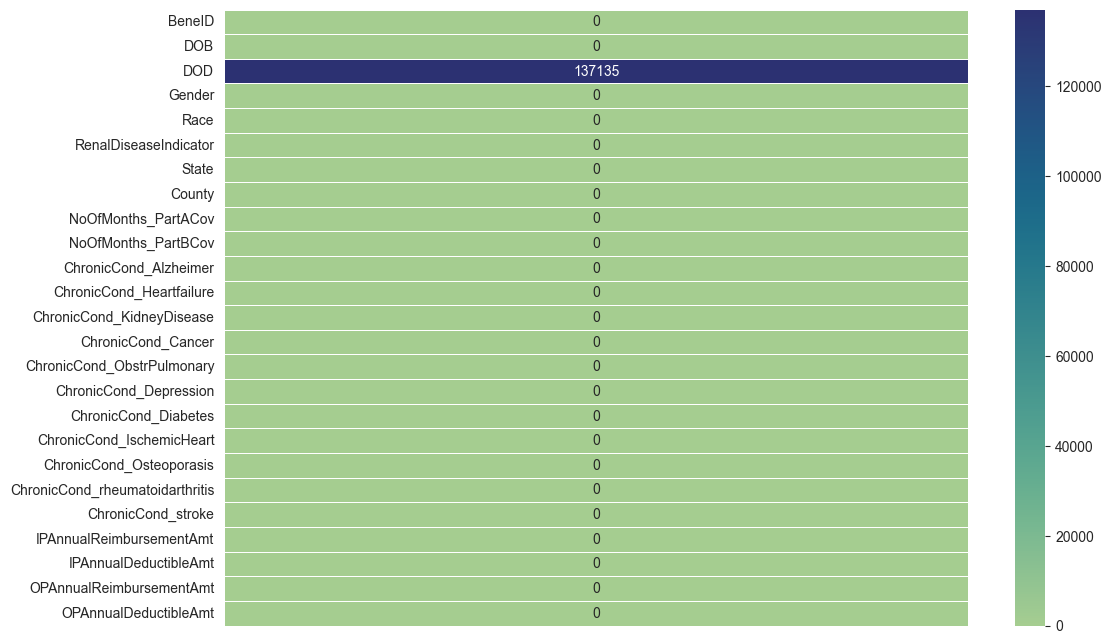

In [11]:
# Plot columns in heatmap to visual null columns
plt.figure(figsize = (12,8))
sns.heatmap(null_beneficiary,xticklabels=False, cmap='crest', annot = True, linewidths = 0.5, fmt = '.7g')
plt.show()

<font color = "#000000" size = 3px>
     Insights:<br>
     The above plot describes the null values in each column of beneficiary data. As we observed there is only one column with null values which is <font color = "#FF5722"> DOD</font> column.<br>
      The null values in <font color = "#FF5722"> DOD </font> column means may be the benficiary has null value in <font color = "#FF5722"> DOD </font> column is still alive. Let we check it in further analysis.
     </font> 

<font color = "#000000" size = 4px>
    <b>Explore BeneID</b>
    </font>

In [12]:
# check is there any duplicate benfificiaries
dup_counts = train_ben_data['BeneID'].duplicated().value_counts()
dup_counts.head()

BeneID
False    138556
Name: count, dtype: int64

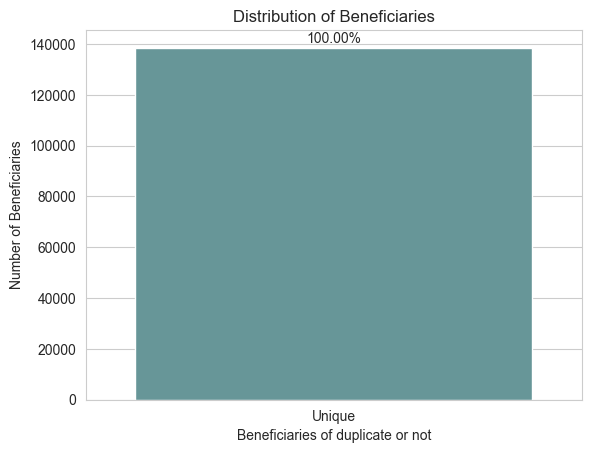

In [136]:

bar_benID = sns.barplot(x = dup_counts.index, y = dup_counts.values, color = '#5F9EA0')
percent_benID = percent(dup_counts)

annotate_labels(bar_benID, percent_benID, plot_type = 'bar')

plt.title("Distribution of Beneficiaries")
plt.xlabel("Beneficiaries of duplicate or not")
plt.ylabel("Number of Beneficiaries")
plt.xticks(ticks = [0], labels = ['Unique'])
plt.show()

<font color = "#000000" size  = 3px>
Insights:<br>
A review of BeneID column indicates 0% duplicates, Suggesting 100% of Beneficiaries are unique. <font>

<font color = "#000000" size = 4px>
     <b>Explore Gender </b></font>

In [14]:
train_ben_data['Gender'].unique()

array([1, 2])

In [15]:
# changing gender value 2 to 0
train_ben_data['Gender'] = [0 if val == 2 else 1 for val in train_ben_data['Gender']]  

In [16]:
train_ben_data['Gender'].unique()

array([1, 0])

In [17]:
ben_gender_cnt = train_ben_data['Gender'].value_counts().reset_index()
ben_gender_cnt.columns = ['Gender', 'No_of_Beneficiaries']
ben_gender_cnt

,Gender,No_of_Beneficiaries
0,0,79106
1,1,59450


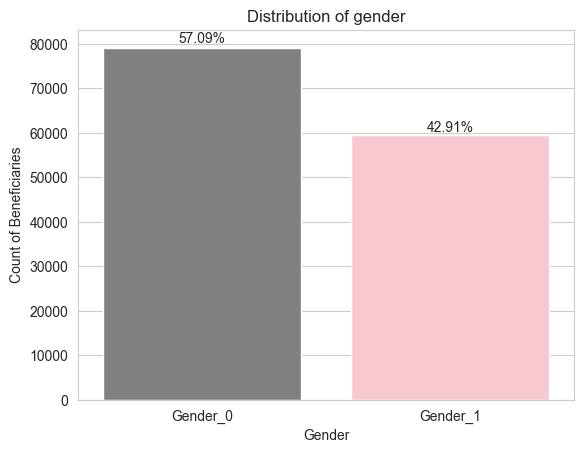

In [18]:
# Distribution of Gender
bar_gender = sns.barplot(x = 'Gender', y = 'No_of_Beneficiaries', data = ben_gender_cnt, palette = ['grey','pink'])
percent_gender = percent(ben_gender_cnt['No_of_Beneficiaries'])

annotate_labels(bar_gender, labels = percent_gender, plot_type = 'bar')

plt.title("Distribution of gender")
plt.xlabel("Gender")
plt.ylabel('Count of Beneficiaries')
plt.xticks(ticks = [0,1] ,labels = ['Gender_0','Gender_1'])
plt.show()

<font color = "#000000" size = 3px>
     Insights:<br>
     Gender of beneficiaries classified in binary values as 0 and 1.<br>
     Compared to Gender_0 and Gender_1, more beneficiaries are in Gender_0<br>
     </font>


<font color = "#000000" size = 4px>
    <b>Explore DOB</b>
    </font>

In [19]:
# Convert DOB column data type to Datetime

train_ben_data['DOB'] = pd.to_datetime(train_ben_data['DOB'])

<font color = "#000000" size = 3px>
   <b><i> Birth year of Beneficiaries </b></i>
   </font>

In [20]:
train_ben_data['Birth_year'] = train_ben_data['DOB'].dt.year

In [21]:
train_ben_data['Birth_year'].nunique()

75

In [22]:
ben_top20birthYear_count = pd.DataFrame(train_ben_data['Birth_year'].value_counts().reset_index())
ben_top20birthYear_count.columns = ['Birth_year','No_of_Beneficiaries']
ben_top20birthYear_count = ben_top20birthYear_count.nlargest(20, 'No_of_Beneficiaries')
ben_top20birthYear_count.head()

,Birth_year,No_of_Beneficiaries
0,1941,5903
1,1939,5891
2,1943,5821
3,1940,5808
4,1942,5806


In [23]:
sorted_birthyear_cnt = ben_top20birthYear_count.sort_values(by = 'No_of_Beneficiaries', ascending = False)['Birth_year']

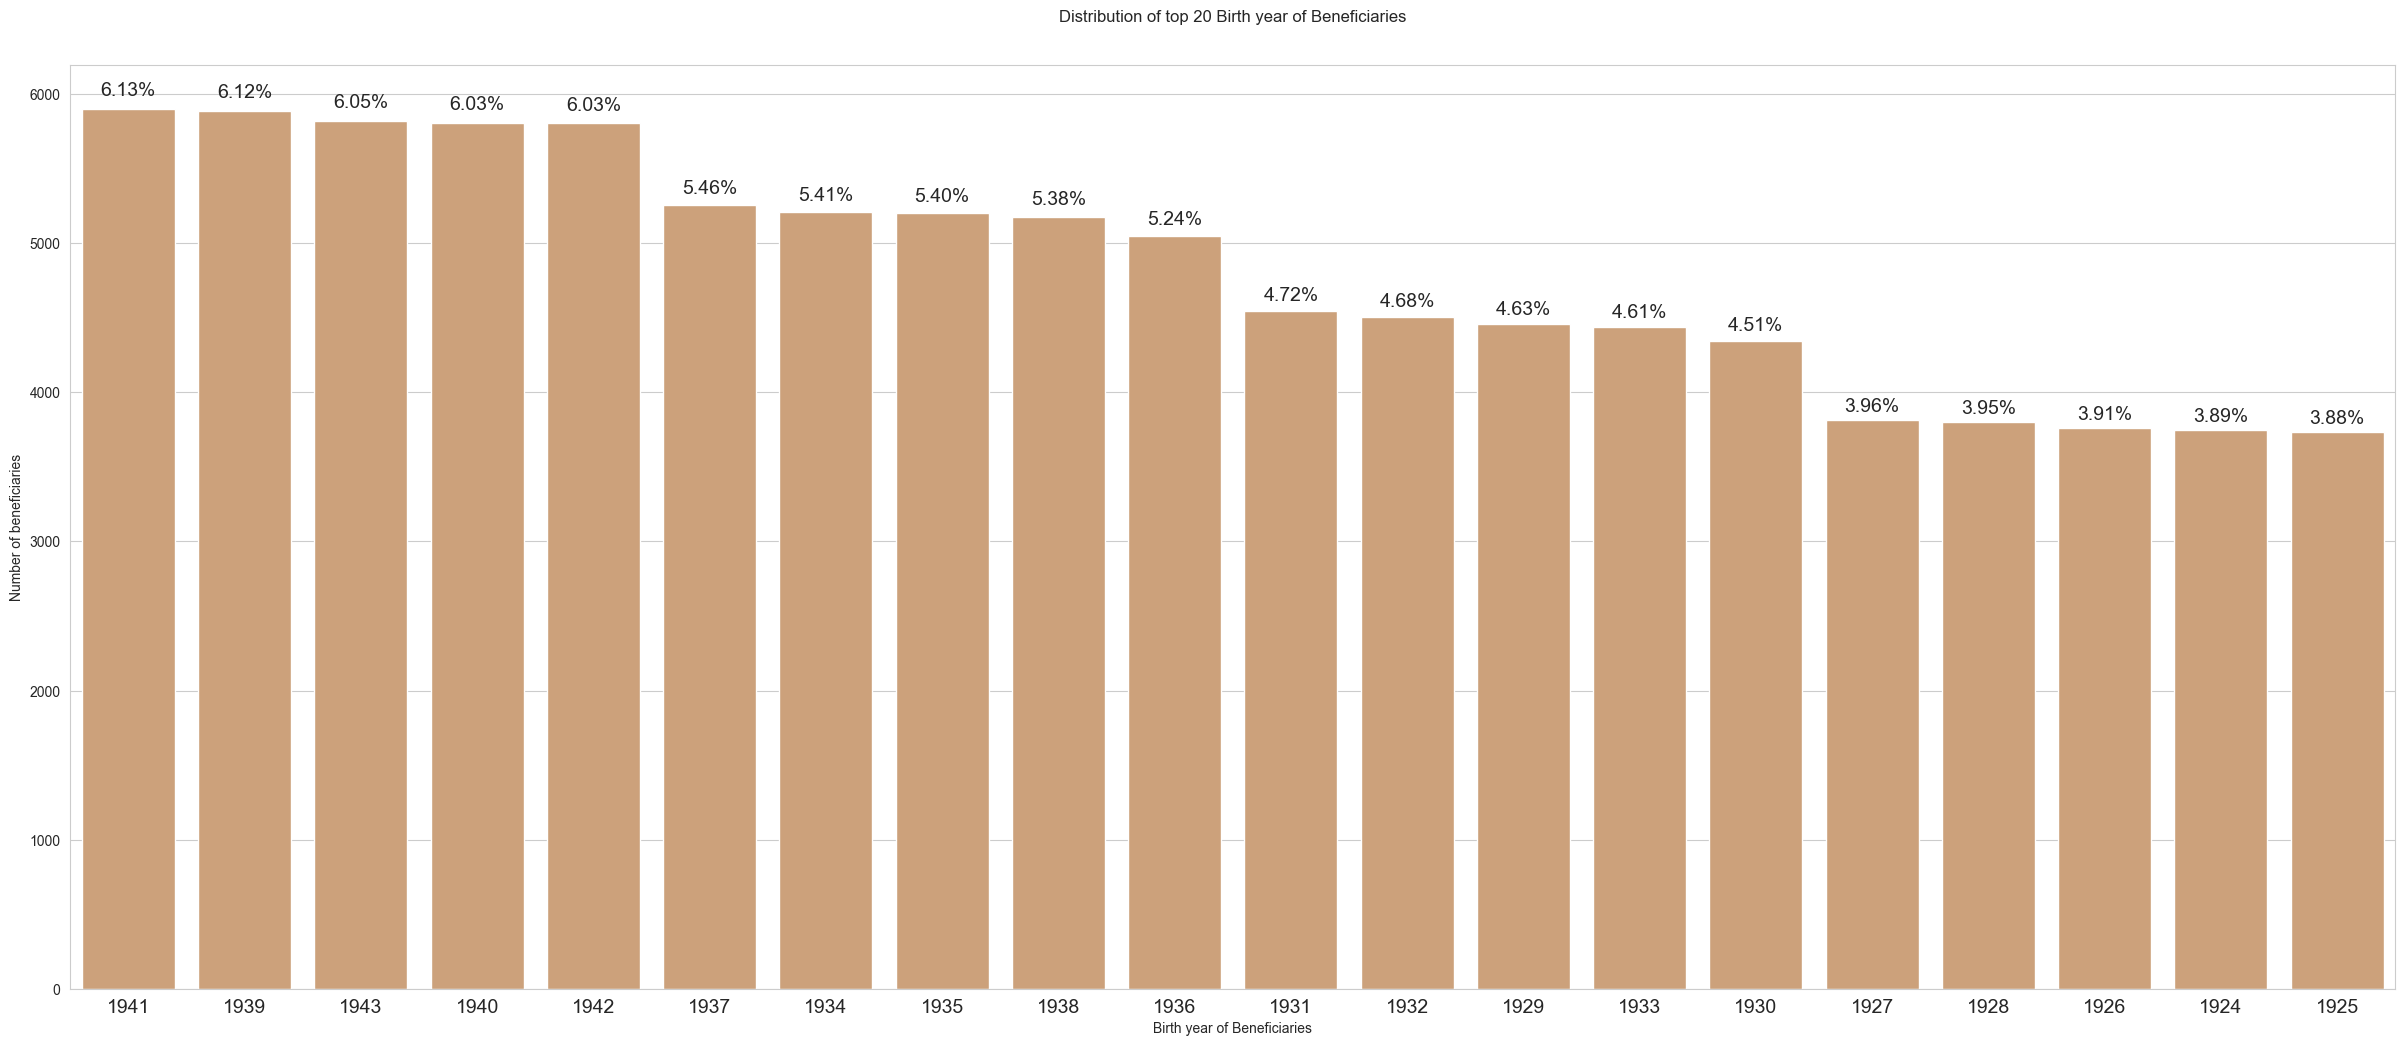

In [137]:
# Plot the distribution of Birth year of beneficiaries

plt.figure(figsize = (30,12))
bar_BirthYear = sns.barplot(data = ben_top20birthYear_count, x = 'Birth_year', y = 'No_of_Beneficiaries', palette = ['#DAA06D'], order = sorted_birthyear_cnt)
percent_birthYears = percent(ben_top20birthYear_count['No_of_Beneficiaries'])

annotate_labels(bar_BirthYear, percent_birthYears, plot_type = 'bar', fontsize = 14)

plt.title("Distribution of top 20 Birth year of Beneficiaries\n\n")
plt.xlabel("Birth year of Beneficiaries")
plt.ylabel("Number of beneficiaries")
plt.xticks(fontsize = 14)    
plt.show()

<font color = "#000000" size = 3px>
    Insights:<br>
    The frequency of Beneficiaries based on their Birth year indicates, Around 30% of beneficiaries Birth year are 1939 to 1943
    </font>

<font color = "#000000" size = 3px>
   <b><i> Birth Month of Beneficiaries </b></i>
   </font>

In [25]:
train_ben_data['Birth_Month'] = train_ben_data['DOB'].dt.month

In [26]:
ben_birthMonth_count = train_ben_data['Birth_Month'].value_counts().reset_index()
ben_birthMonth_count.columns = ['Birth_Month','No_of_Beneficiaries']
ben_birthMonth_count.head()

,Birth_Month,No_of_Beneficiaries
0,12,11731
1,9,11656
2,3,11648
3,10,11646
4,4,11625


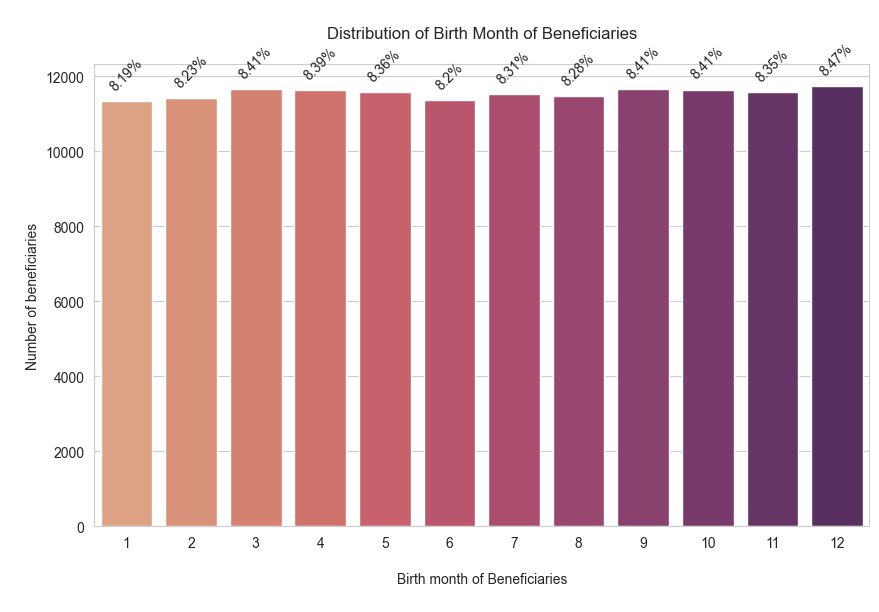

In [27]:
# Plot the Distribution of Birth month of Beneficiaries

plt.figure(figsize = (10,6))
bar_BirthMonth = sns.barplot(data = ben_birthMonth_count, x = 'Birth_Month', y = 'No_of_Beneficiaries', palette = 'flare')

for i in bar_BirthMonth.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    
    bar_BirthMonth.annotate(f"{str(round((height*100)/train_ben_data.shape[0],2))+"%"}", (x + width/2, y + height*1.025), ha = 'center', rotation = 45)

plt.title("\nDistribution of Birth Month of Beneficiaries\n")
plt.xlabel("\nBirth month of Beneficiaries\n")
plt.ylabel("\nNumber of beneficiaries")
plt.show()


<font color = "#000000" size = 3px>
    Insights:<br>
    Analysis of Beneficiaries based on their Birth month indicates there is no significant difference in Birth month of Beneficiaries

<font color = "#000000" size = 4px>
     <b> Explore DOD </b>
     </font>

In [28]:
train_ben_data['DOD'].unique()

array([nan, '2009-12-01', '2009-09-01', '2009-05-01', '2009-07-01',
       '2009-08-01', '2009-10-01', '2009-06-01', '2009-04-01',
       '2009-02-01', '2009-11-01', '2009-03-01'], dtype=object)

In [29]:
# 1 for alive and 0 for dead
train_ben_data['Dead_or_Alive'] = [1 if pd.isnull(val) else 0 for val in train_ben_data['DOD']]

In [30]:
ben_DeadAlive_count = train_ben_data['Dead_or_Alive'].value_counts().reset_index()
ben_DeadAlive_count.columns = ['Dead_or_Alive', 'No_of_Beneficiaries']
ben_DeadAlive_count = ben_DeadAlive_count.sort_values('Dead_or_Alive')
ben_DeadAlive_count.head()

,Dead_or_Alive,No_of_Beneficiaries
1,0,1421
0,1,137135


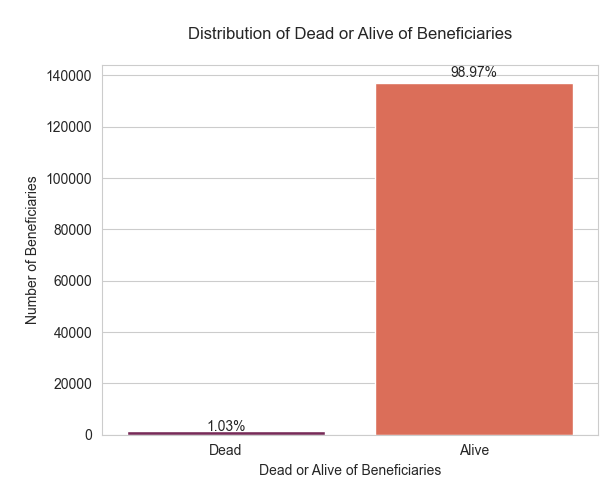

In [31]:
# Plot the distribution of Dead or alive of Beneficiaries

bar_DeadAlive = sns.barplot(data = ben_DeadAlive_count, x = 'Dead_or_Alive', y = 'No_of_Beneficiaries', palette = 'rocket')
percent_DeadAlive = percent(ben_DeadAlive_count['No_of_Beneficiaries'])

annotate_labels(bar_DeadAlive, percent_DeadAlive, plot_type = 'bar')

plt.title("\nDistribution of Dead or Alive of Beneficiaries\n")
plt.xlabel("Dead or Alive of Beneficiaries")
plt.ylabel("\nNumber of Beneficiaries")
plt.xticks(ticks = [0,1], labels = ['Dead', 'Alive'])    
plt.show()

<font color = "#000000" size = 3px>
    Insights:<br> 
    The difference between Dead and Alive Beneficiaries indicates, Around 99% of Beneficiaries are still alive.</font>

<font color = "#000000" size = 4px>
      <b> Explore Age </b>
      </font>

In [32]:
from datetime import datetime   
today = pd.Timestamp.now()
today

Timestamp('2024-11-05 10:05:44.756825')

In [33]:
train_ben_data['DOD'] = pd.to_datetime(train_ben_data['DOD'])

In [34]:
train_ben_data['Age'] = train_ben_data.apply(lambda records : ((today if pd.isnull(records['DOD']) else records['DOD']) - records['DOB']).days // 365, axis = 1)

In [35]:
train_ben_data['Age'].describe()

count    138556.000000
mean         87.899485
std          12.819685
min          36.000000
25%          82.000000
50%          89.000000
75%          96.000000
max         115.000000
Name: Age, dtype: float64

In [36]:
train_ben_data['Age'].skew()

np.float64(-0.8203495401192923)

In [37]:
train_ben_data['Age'].kurt()

np.float64(1.2958009349781885)

In [38]:
train_ben_data['Age'].var()

np.float64(164.34433346473605)

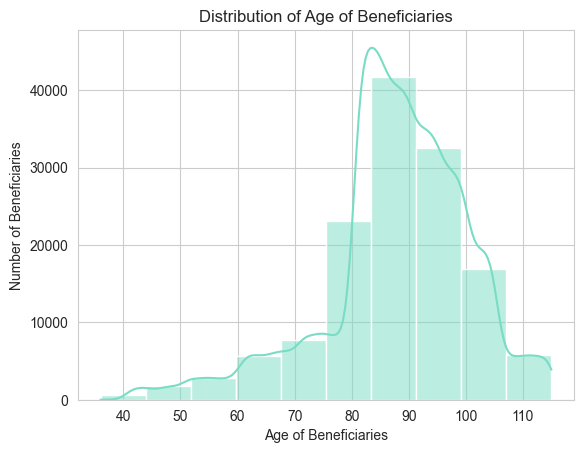

In [39]:
# Plot the distribution of age of Beneficiaries

sns.histplot(train_ben_data, x = 'Age', color = '#79dcc4', bins = 10, kde = True)
plt.title("Distribution of Age of Beneficiaries")
plt.xlabel("Age of Beneficiaries")
plt.ylabel("Number of Beneficiaries")
plt.show()

<font color = "#000000" size = 4px>
     <b> Explore Age group </b>
     </font>

In [40]:
# Age groups 1-40 group 1, 40-60 group 2, 60-80 group 3, 80 and above group 4

def age_groups(age):
    if age >= 1 and age <= 40:
        return 1
    elif age > 40 and age <= 60:
        return 2
    elif age > 60 and age <= 80:
        return 3
    else:
        return 4
    

In [41]:
train_ben_data['Age_groups'] = train_ben_data['Age'].apply(lambda age : age_groups(age))

In [42]:
train_ben_data['Age_groups'].unique()

array([4, 2, 3, 1])

In [43]:
ben_agegroup_count = train_ben_data['Age_groups'].value_counts().reset_index()
ben_agegroup_count.columns = ['Age_groups', 'No_of_Beneficiaries']
ben_agegroup_count = ben_agegroup_count.sort_values('No_of_Beneficiaries')
ben_agegroup_count

,Age_groups,No_of_Beneficiaries
3,1,22
2,2,5531
1,3,18548
0,4,114455


In [44]:
grp_1 = train_ben_data[train_ben_data['Age_groups'] == 1]['Age'].reset_index()
grp_2 = train_ben_data[train_ben_data['Age_groups'] == 2]['Age'].reset_index()
grp_3 = train_ben_data[train_ben_data['Age_groups'] == 3]['Age'].reset_index()
grp_4 = train_ben_data[train_ben_data['Age_groups'] == 4]['Age'].reset_index()

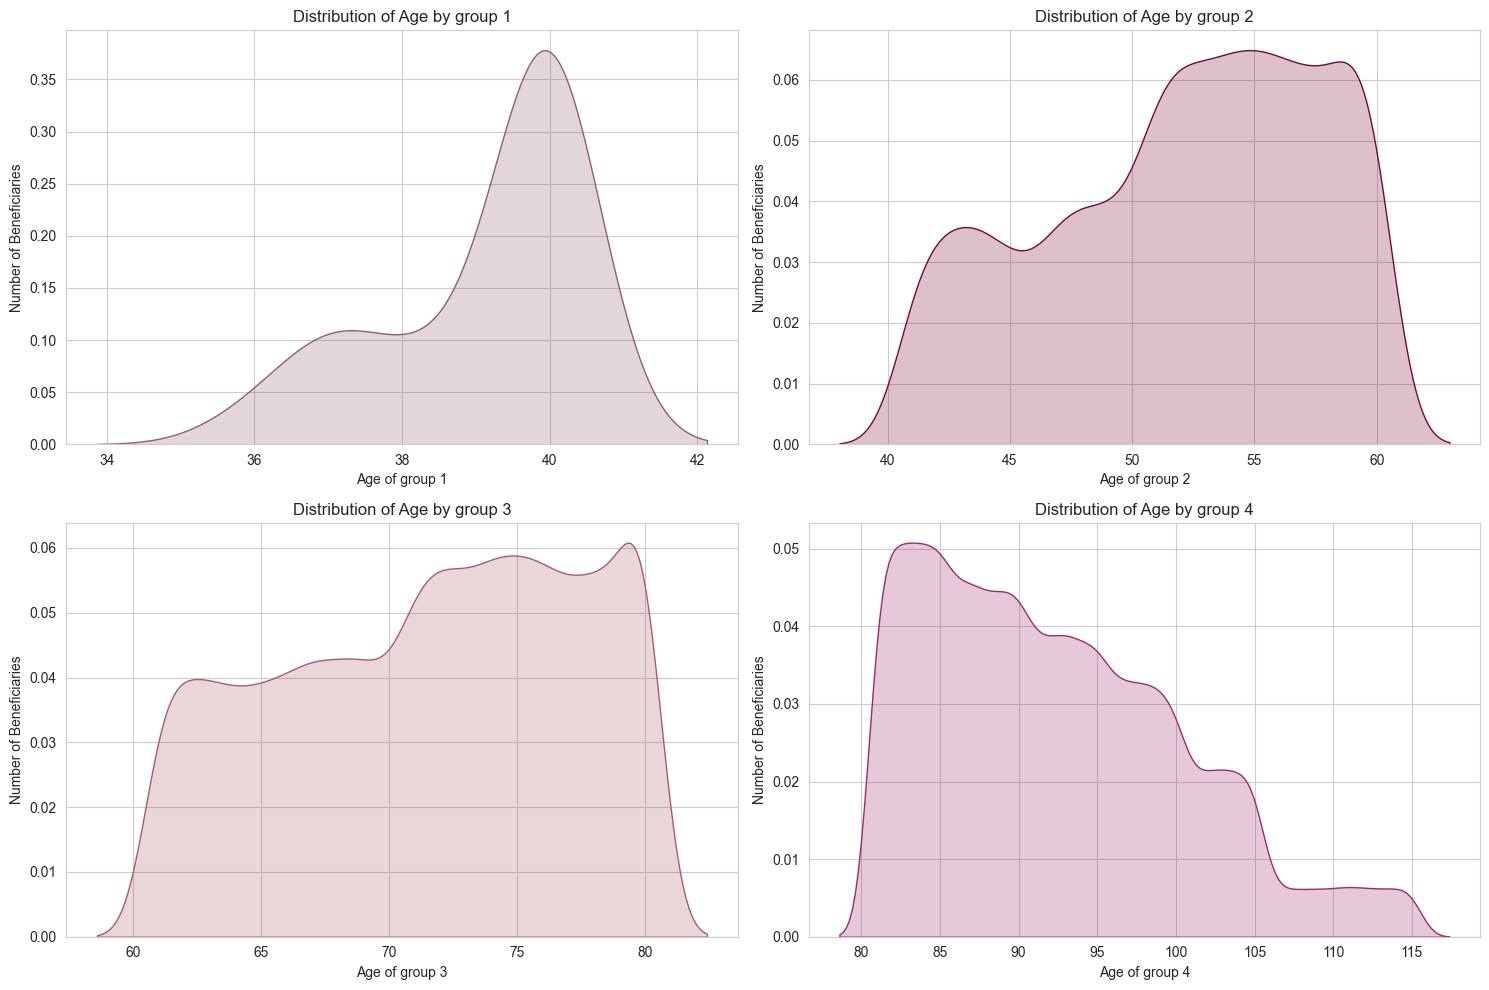

In [45]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

sns.kdeplot(grp_1['Age'], ax = ax[0,0], color = "#915F6D", fill = True)
ax[0,0].set_title("Distribution of Age by group 1")
ax[0,0].set_xlabel("Age of group 1")
ax[0,0].set_ylabel("Number of Beneficiaries")

sns.kdeplot(grp_2['Age'], ax = ax[0,1], color = '#770737', fill = True)
ax[0,1].set_title("Distribution of Age by group 2")
ax[0,1].set_xlabel("Age of group 2")
ax[0,1].set_ylabel("Number of Beneficiaries")

sns.kdeplot(grp_3['Age'], ax = ax[1,0], color = '#A95C68', fill = True)
ax[1,0].set_title("Distribution of Age by group 3")
ax[1,0].set_xlabel("Age of group 3")
ax[1,0].set_ylabel("Number of Beneficiaries")

sns.kdeplot(grp_4['Age'], ax = ax[1,1], color = '#9F2B68', fill = True)
ax[1,1].set_title("Distribution of Age by group 4")
ax[1,1].set_xlabel("Age of group 4")
ax[1,1].set_ylabel("Number of Beneficiaries")


plt.tight_layout()
plt.show()

<font color = "#000000" size = 4px>
    <b> Explore Race </b>
    </font>

In [46]:
train_ben_data['Race'].unique()

array([1, 2, 3, 5])

In [47]:
def transform_race(ben):
    if ben == 1:
        return 1
    elif ben == 2:
        return 2
    elif ben == 3:
        return 3
    else:
        return 4

In [48]:
train_ben_data['Race'] = train_ben_data['Race'].apply(lambda race : transform_race(race))

In [49]:
ben_Race_count = train_ben_data['Race'].value_counts().reset_index()
ben_Race_count.columns = ['Race','No_of_Beneficiaries']
ben_Race_count

,Race,No_of_Beneficiaries
0,1,117057
1,2,13538
2,3,5059
3,4,2902


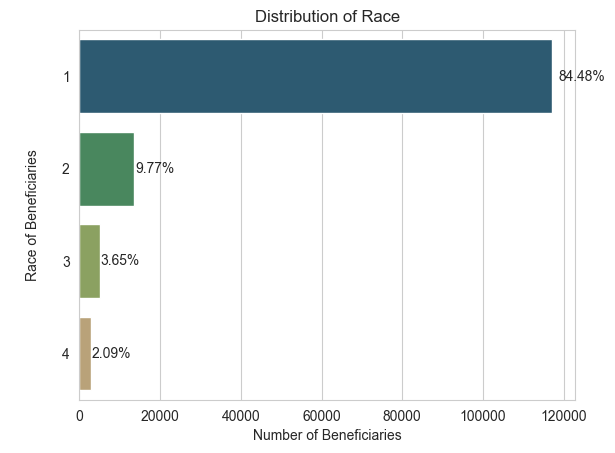

In [50]:

bar_race_count = sns.barplot(y= 'Race', x = 'No_of_Beneficiaries', data = ben_Race_count, palette = 'gist_earth', orient = 'h')
percent_race = percent(ben_Race_count['No_of_Beneficiaries'])

annotate_labels(bar_race_count, percent_race, plot_type = 'barh')

plt.title("Distribution of Race")
plt.ylabel("\nRace of Beneficiaries\n")
plt.xlabel("Number of Beneficiaries")
plt.show()

<font color = "#000000" size = 4px>
    <b> Explore RenalDiseaseIndicator </b>
    </font>

In [51]:
train_ben_data['RenalDiseaseIndicator'].unique()

array(['0', 'Y'], dtype=object)

In [52]:
train_ben_data['RenalDiseaseIndicator'] = [1 if val == 'Y' else 0 for val in train_ben_data['RenalDiseaseIndicator']]

In [53]:
ben_RenalDisease_count = train_ben_data['RenalDiseaseIndicator'].value_counts().reset_index()
ben_RenalDisease_count.columns = ['RenalDiseaseIndicator', 'No_of_Beneficiaries']
ben_RenalDisease_count

,RenalDiseaseIndicator,No_of_Beneficiaries
0,0,118978
1,1,19578


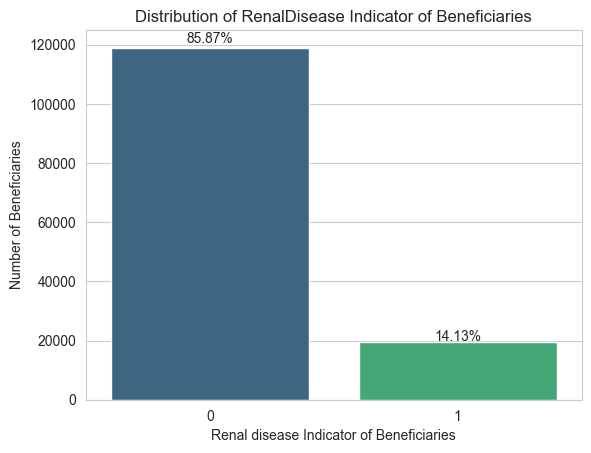

In [54]:
bar_RenalDisease_count = sns.countplot(data = train_ben_data, x = 'RenalDiseaseIndicator', palette = 'viridis')
percent_renalDisease = percent(ben_RenalDisease_count['No_of_Beneficiaries'])

annotate_labels(bar_RenalDisease_count, percent_renalDisease, plot_type = 'bar')
   
plt.title("Distribution of RenalDisease Indicator of Beneficiaries")
plt.xlabel("Renal disease Indicator of Beneficiaries")
plt.ylabel("Number of Beneficiaries") 
plt.show()

<font color = "#000000" size = 4px>
    <b> Explore State </b>
</font>

In [55]:
train_ben_data['State'].nunique()

52

In [56]:
ben_top20state_count = train_ben_data['State'].value_counts().reset_index()
ben_top20state_count.columns = ['State', 'No_of_beneficiaries']
ben_top20state_count = ben_top20state_count.nlargest(20, 'No_of_beneficiaries')
ben_top20state_count.head()

,State,No_of_beneficiaries
0,5,12052
1,10,9771
2,45,8780
3,33,8443
4,39,6055


In [57]:
sorted_statecnt = ben_top20state_count.sort_values(by = 'No_of_beneficiaries', ascending = False)['State']

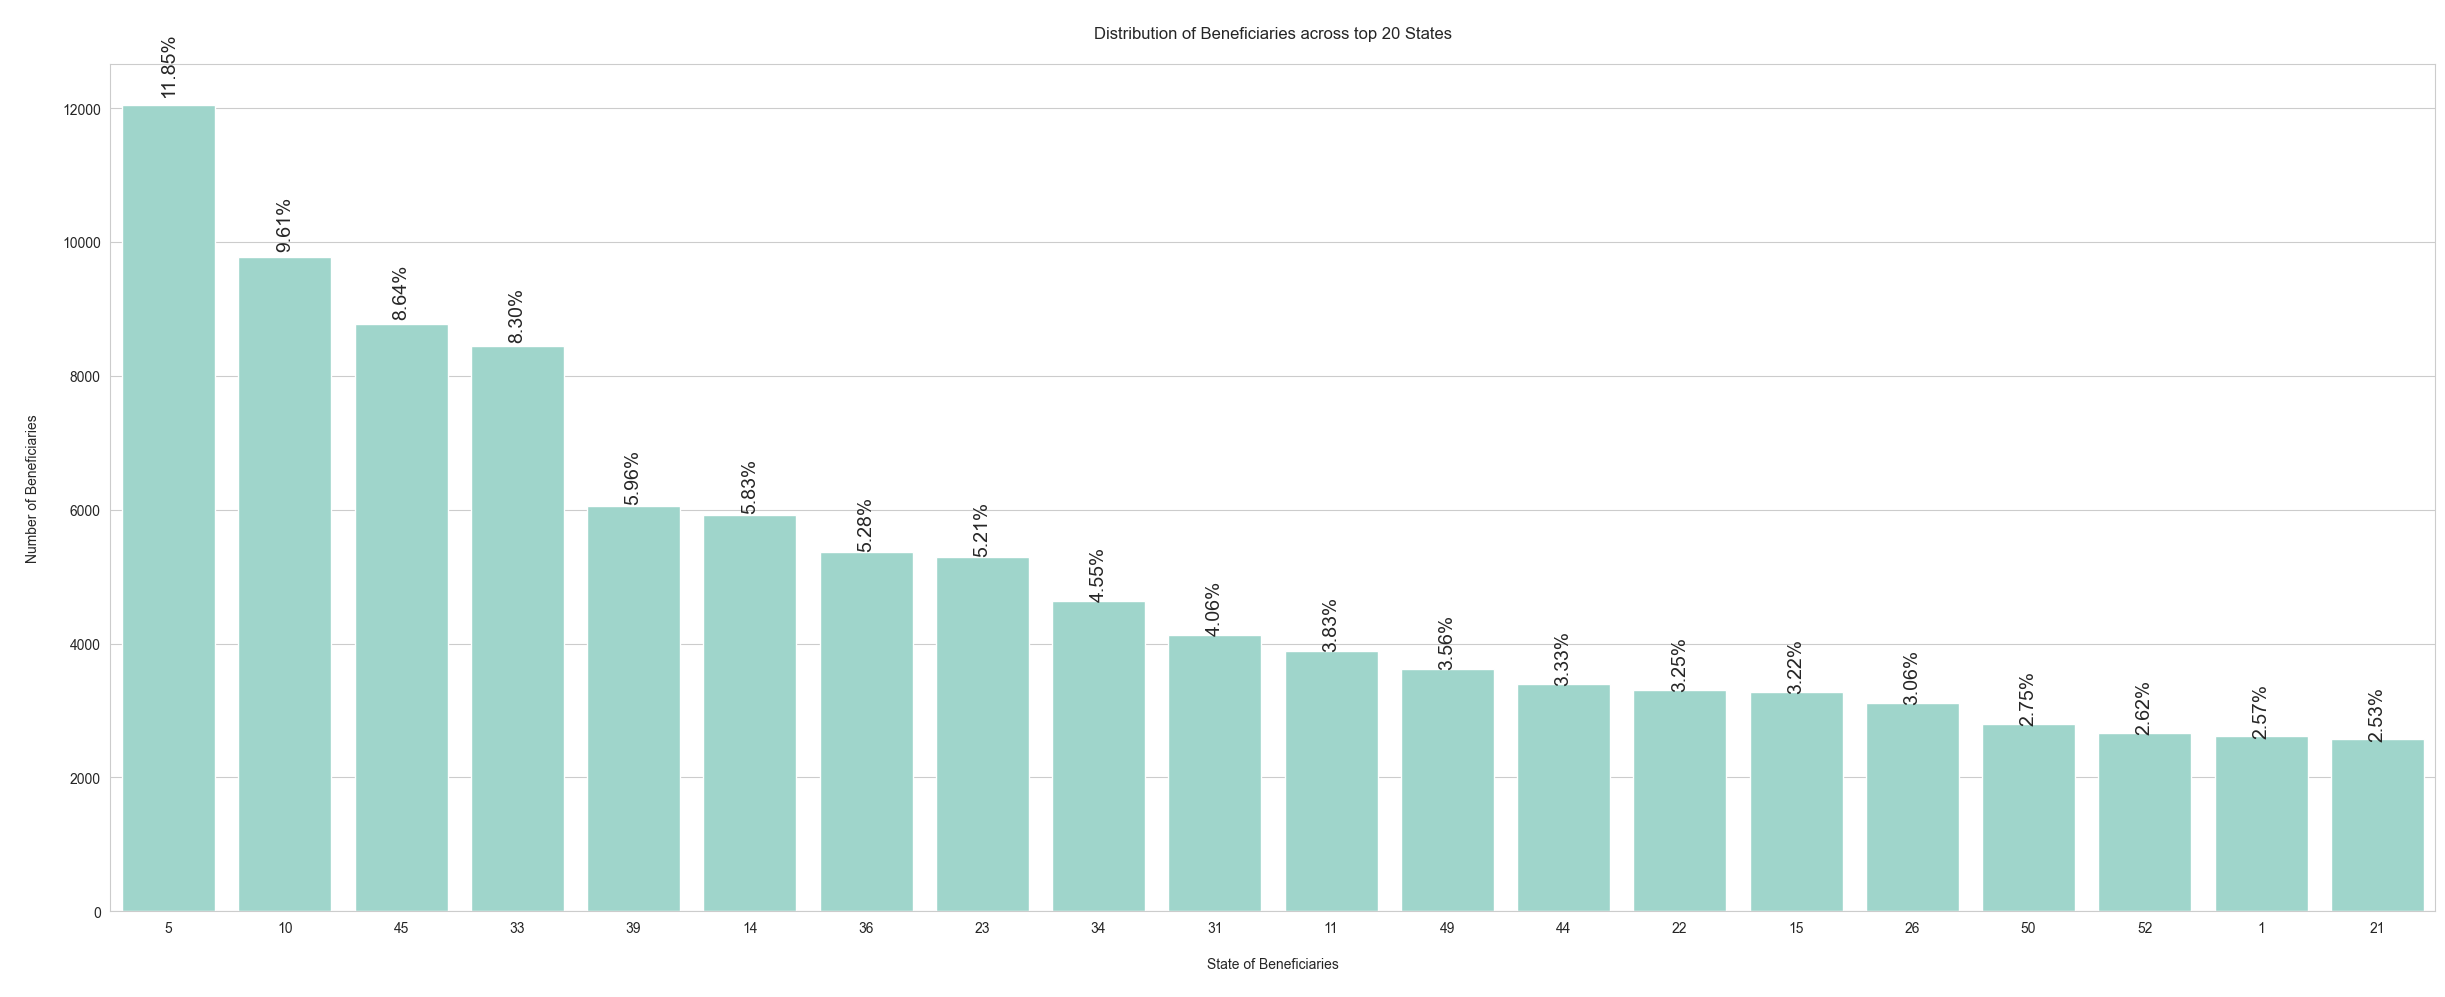

In [58]:

plt.figure(figsize = (30,11))
bar_stateCount = sns.barplot(x = 'State', y = 'No_of_beneficiaries', data = ben_top20state_count, palette = ['#96DED1'], order = sorted_statecnt)
percent_statecnt = percent(ben_top20state_count['No_of_beneficiaries'])

annotate_labels(bar_stateCount, percent_statecnt, plot_type = 'bar', rotation = 90, fontsize = 14)

plt.title("\nDistribution of Beneficiaries across top 20 States\n")
plt.xlabel("\nState of Beneficiaries\n")
plt.ylabel("\nNumber of Beneficiaries\n")    
plt.show()

<font color = "#000000" size = 4px>
     <b> Explore Country </b>
     </font>

In [59]:
train_ben_data['County'].nunique()

314

<font color = "#000000" size = 3px>
   <b><i> Top 20 Country </b></i>
   </font>

In [60]:
ben_top20_country = train_ben_data['County'].value_counts().reset_index()
ben_top20_country.columns = ['Country', 'No_of_Beneficiaries']
ben_top20_country = ben_top20_country.nlargest(20, columns = 'No_of_Beneficiaries')
ben_top20_country.head()

,Country,No_of_Beneficiaries
0,200,3943
1,10,3587
2,20,3176
3,60,3003
4,0,2977


In [61]:
sorted_top20country = ben_top20_country.sort_values('No_of_Beneficiaries', ascending = False)['Country']

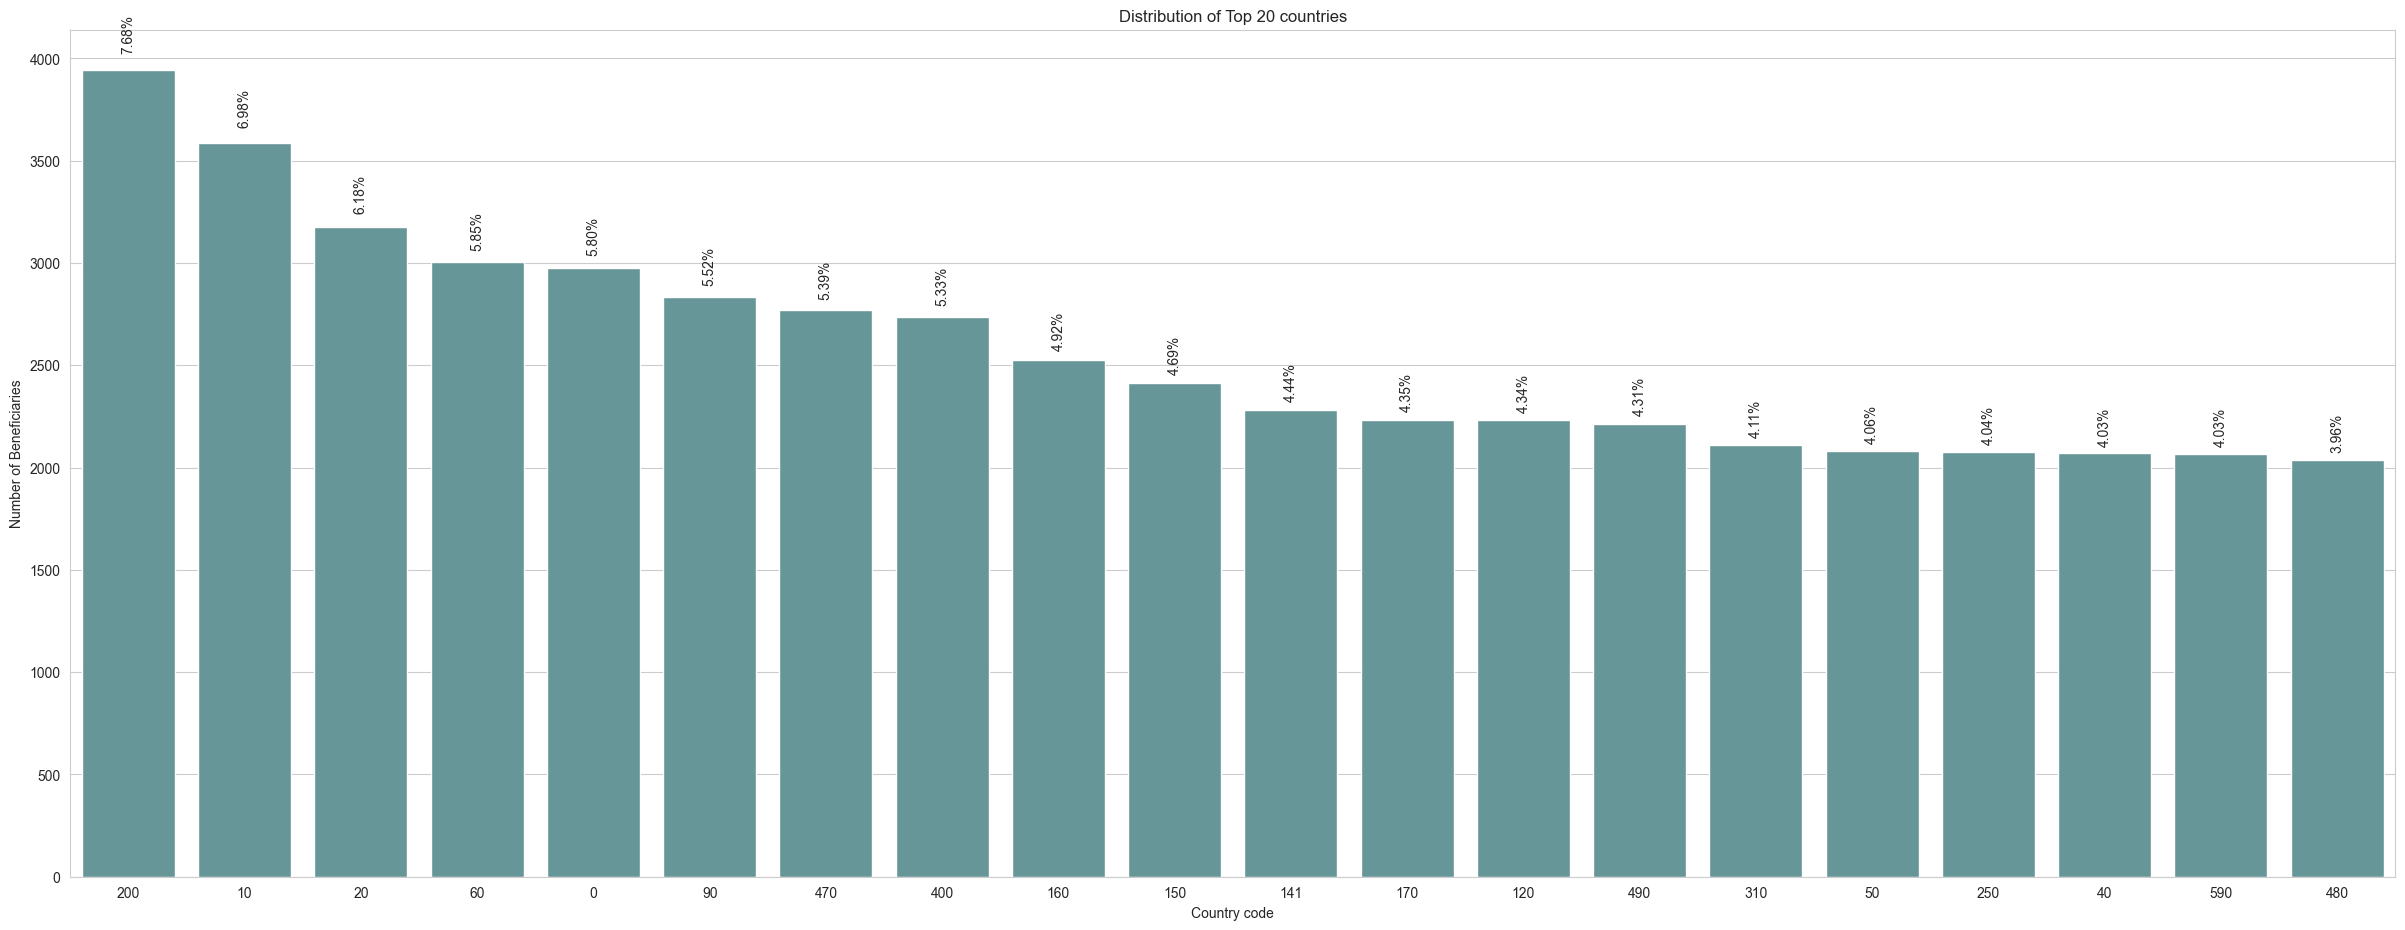

In [62]:

plt.figure(figsize = (30,11))

bar_top20_country = sns.barplot(x = 'Country', y = 'No_of_Beneficiaries', data = ben_top20_country, palette = ['#5F9EA0'], order = sorted_top20country)
percent_top20Country = percent(ben_top20_country['No_of_Beneficiaries'])

annotate_labels(bar_top20_country, percent_top20Country, rotation = 90, label_space = 1.025)
 
plt.title("Distribution of Top 20 countries")
plt.xlabel("Country code")
plt.ylabel("Number of Beneficiaries")   
plt.show()


<font color = "#000000" size = 3px>
   <b><i> Bottom 20 Country </b></i>
   </font>

In [63]:
ben_bottom20_country = train_ben_data['County'].value_counts().reset_index()
ben_bottom20_country.columns = ['Country', 'No_of_Beneficiaries']
ben_bottom20_country = ben_bottom20_country.nsmallest(20, columns = 'No_of_Beneficiaries')
ben_bottom20_country.head()

,Country,No_of_Beneficiaries
305,804,1
306,834,1
307,753,1
308,742,1
309,117,1


In [64]:
sorted_bottom20Country = ben_bottom20_country.sort_values('No_of_Beneficiaries', ascending = False)['Country']

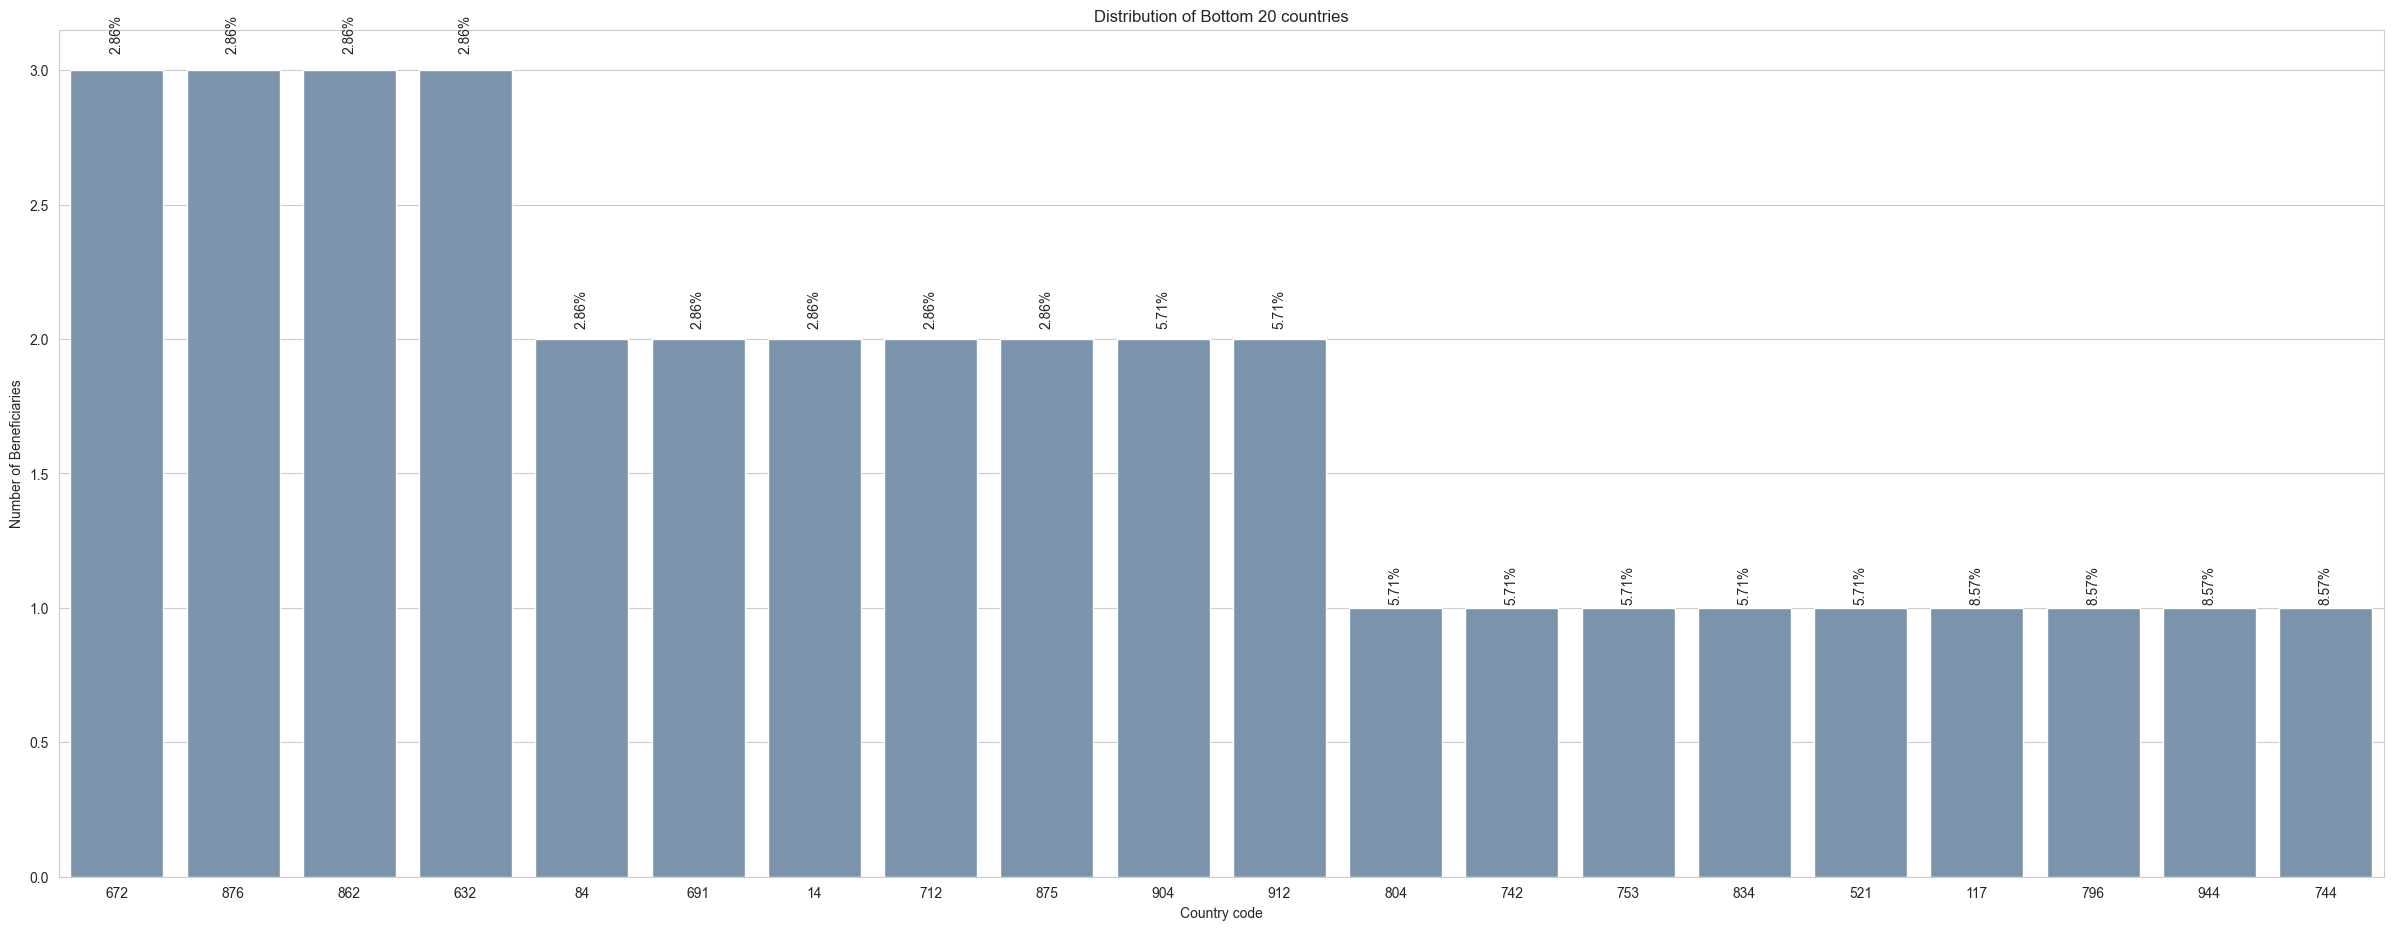

In [65]:

plt.figure(figsize = (30,11))

bar_bottom20_country = sns.barplot(x = 'Country', y = 'No_of_Beneficiaries', data = ben_bottom20_country, palette = ['#7393B3'], order = sorted_bottom20Country)
percent_bottom20Country = percent(ben_bottom20_country['No_of_Beneficiaries'])

annotate_labels(bar_bottom20_country, percent_bottom20Country, rotation = 90, label_space = 1.025)
    
plt.title("Distribution of Bottom 20 countries")
plt.xlabel("Country code")
plt.ylabel("Number of Beneficiaries")    
plt.show()

<font color = "#000000" size = 4px>
      <b> Explore NoOfMonths_PartACov </b>
      </font>

In [66]:
train_ben_data['NoOfMonths_PartACov'].unique()

array([12,  0,  3,  7, 10, 11,  8,  4,  1,  6,  2,  9,  5])

In [67]:
ben_partA_cov = train_ben_data['NoOfMonths_PartACov'].value_counts().reset_index()
ben_partA_cov.columns = ['NoOfMonths_PartACov', 'No_of_Beneficiaries']
ben_partA_cov.head()

,NoOfMonths_PartACov,No_of_Beneficiaries
0,12,137389
1,0,1000
2,6,38
3,11,28
4,8,26


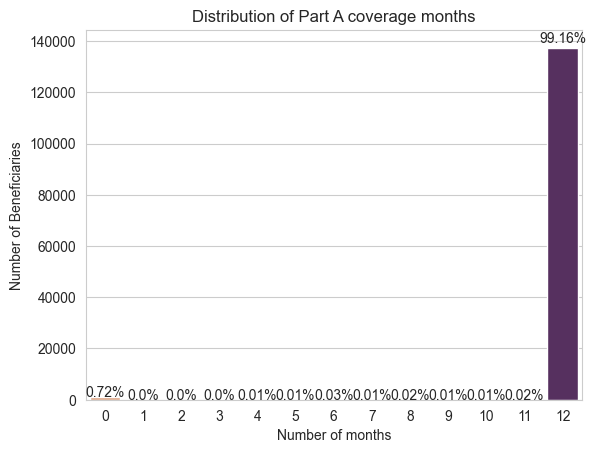

In [68]:

bar_partA_cov = sns.barplot(x = 'NoOfMonths_PartACov', y = 'No_of_Beneficiaries', data = ben_partA_cov, palette = 'flare')

for i in bar_partA_cov.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    
    bar_partA_cov.annotate(f"{str(round((height*100)/train_ben_data.shape[0],2))+"%"}", xy = (x + width/2, y + height*1.015), ha = 'center')

plt.title("Distribution of Part A coverage months")
plt.xlabel("Number of months")
plt.ylabel("Number of Beneficiaries")
plt.show()

<font color = "#000000" size = 4px>
     <b> Explore NoOfMonths_PartBCov </b>
     </font>

In [69]:
train_ben_data['NoOfMonths_PartBCov'].unique()

array([12,  0,  1,  9, 11,  3, 10,  8,  2,  6,  4,  5,  7])

In [70]:
ben_partB_cov = train_ben_data['NoOfMonths_PartBCov'].value_counts().reset_index()
ben_partB_cov.columns = ['NoOfMonths_PartBCov', 'No_of_Beneficiaries']
ben_partB_cov.head()

,NoOfMonths_PartBCov,No_of_Beneficiaries
0,12,136902
1,0,675
2,6,282
3,10,150
4,11,143


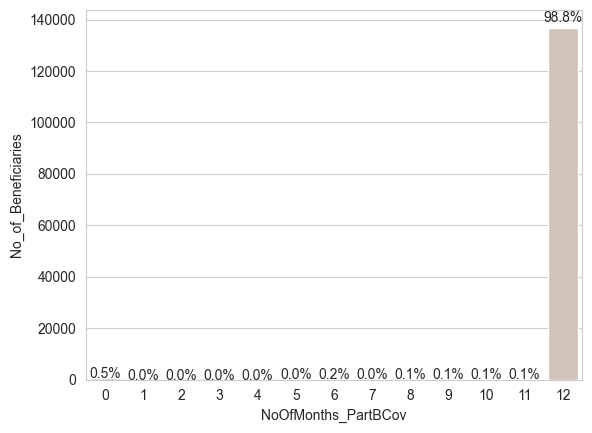

In [71]:

bar_partB_cov = sns.barplot(x = 'NoOfMonths_PartBCov', y = 'No_of_Beneficiaries', data = ben_partB_cov, palette = 'twilight')

for i in bar_partB_cov.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    
    bar_partB_cov.annotate(f"{str(round((height * 100)/train_ben_data.shape[0],1)) + "%"}", xy = (x + width/2, y + height*1.015), ha = 'center')
    
plt.show()

<font color = "#000000" size = 4px>
     <b>Explore ChronicCond_Alzheimer </b>
     </font>

In [72]:
train_ben_data['ChronicCond_Alzheimer'].unique()

array([1, 2])

In [73]:
train_ben_data['ChronicCond_Alzheimer'] = [0 if val == 2 else 1 for val in train_ben_data['ChronicCond_Alzheimer']]

In [74]:
train_ben_data['ChronicCond_Alzheimer'].unique()

array([1, 0])

In [75]:
ben_alzheimer_count = train_ben_data['ChronicCond_Alzheimer'].value_counts().reset_index()
ben_alzheimer_count.columns = ['ChronicCond_Alzheimer', 'No_of_Beneficiaries']
ben_alzheimer_count.head()

,ChronicCond_Alzheimer,No_of_Beneficiaries
0,0,92530
1,1,46026


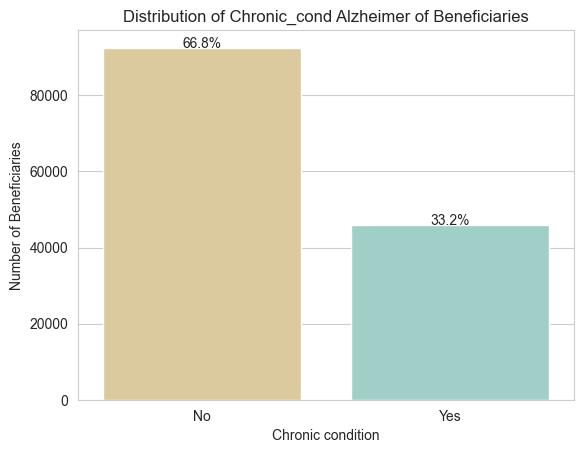

In [76]:

bar_alzheimer = sns.barplot(x = 'ChronicCond_Alzheimer', y = 'No_of_Beneficiaries', data = ben_alzheimer_count, palette = 'BrBG')

for i in bar_alzheimer.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    
    bar_alzheimer.annotate(f"{str(round((height*100)/train_ben_data.shape[0],1)) + '%'}", xy = (x + width/2, y + height), ha = 'center')

plt.title("Distribution of Chronic_cond Alzheimer of Beneficiaries")
plt.xlabel('Chronic condition')
plt.ylabel("Number of Beneficiaries")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

<font color = "#000000" size = 4px>
   <b> Explore ChronicCond_Heartfailure </b>
   </font>

In [77]:
train_ben_data['ChronicCond_Heartfailure'].unique()

array([2, 1])

In [78]:
train_ben_data['ChronicCond_Heartfailure'] = [0 if val == 2 else 1 for val in train_ben_data['ChronicCond_Heartfailure']]

In [79]:
ben_heartfailure_count = train_ben_data['ChronicCond_Heartfailure'].value_counts().reset_index()
ben_heartfailure_count.columns = ['ChronicCond_Heartfailure', 'No_of_Beneficiaries']
ben_heartfailure_count.head()

,ChronicCond_Heartfailure,No_of_Beneficiaries
0,0,70154
1,1,68402


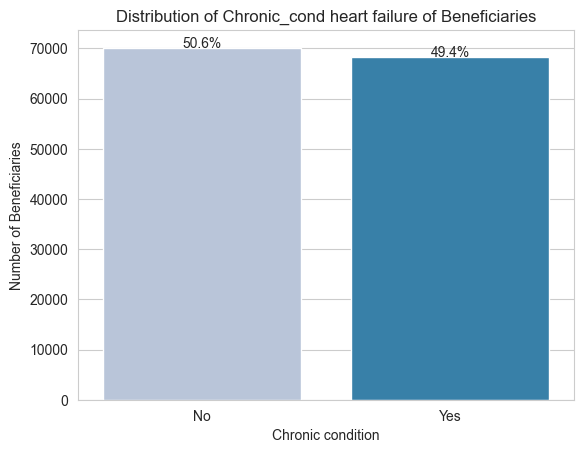

In [80]:
bar_heartfailure = sns.barplot(x = 'ChronicCond_Heartfailure', y = 'No_of_Beneficiaries', data = ben_heartfailure_count, palette = 'PuBu')

for i in bar_heartfailure.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    
    bar_heartfailure.annotate(f"{str(round((height*100)/train_ben_data.shape[0],1)) + "%"}", xy = (x + width/2, y + height), ha = 'center')

plt.title("Distribution of Chronic_cond heart failure of Beneficiaries")
plt.xlabel("Chronic condition")
plt.ylabel("Number of Beneficiaries")
plt.xticks(ticks = [0,1], labels = ['No', 'Yes'])
plt.show()

<font color = "#000000" size = 4px>
   <b>Relationship between Gender and Race</b>
   </font>

In [141]:
train_ben_data['BeneID'].nunique()

138556

In [147]:
Gender_race = pd.crosstab(columns = train_ben_data['Gender'], index = train_ben_data['Race'])
Gender_race

Gender,0,1
Race,,
1,66607,50450
2,8060,5478
3,2792,2267
4,1647,1255


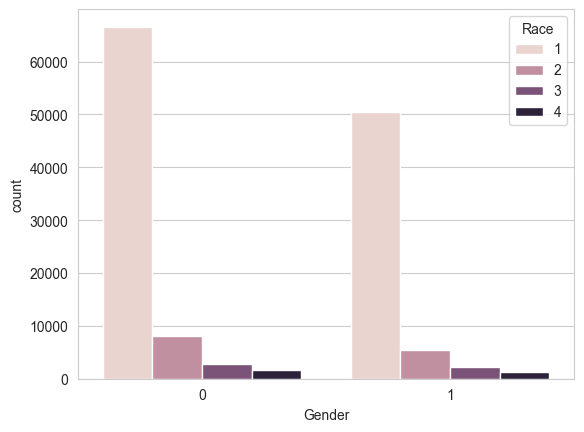

In [151]:
sns.countplot(train_ben_data, x = 'Gender', hue = 'Race')
plt.show()

<font color = "#000000" size = 6px>
     <b> Explore Inpatient data</b>
     </font>

In [81]:
train_Inpatient_data.shape

(40474, 30)

<font color = "#000000" size = 4px>
    <b>Check Data types</b>
    </font>

In [82]:
train_Inpatient_data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

<font color = "#000000" size = 4px>
    <b>Check null values</b>
    </font>

In [83]:
[null_columns for null_columns in train_Inpatient_data.columns if train_Inpatient_data[null_columns].isnull().sum()>0]

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'DeductibleAmtPaid',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [84]:
null_inpatient = pd.DataFrame(train_Inpatient_data.isnull().sum())
null_inpatient.head()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0


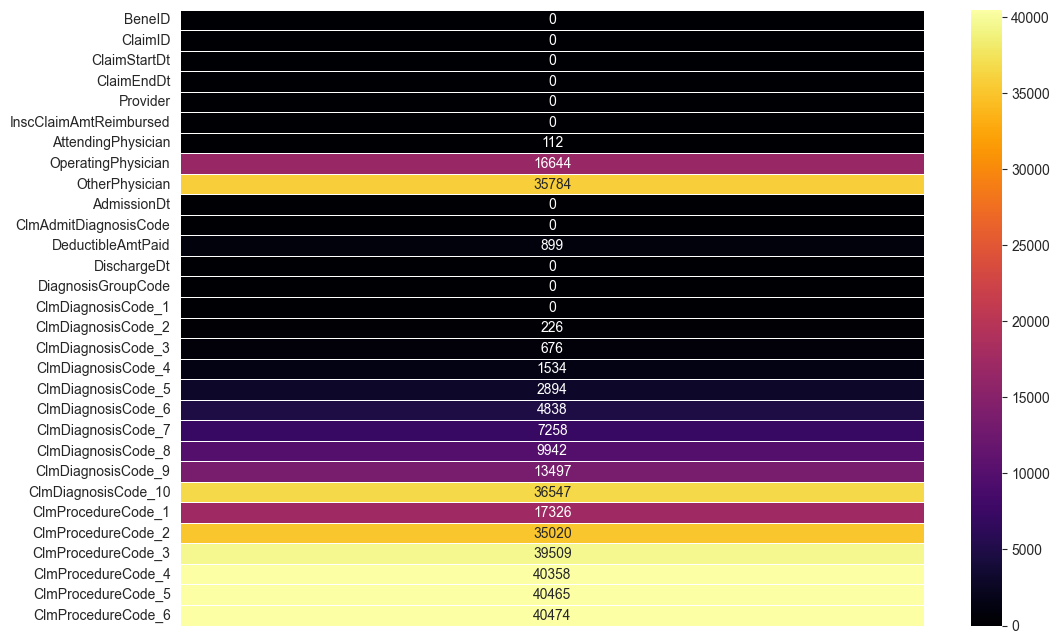

In [85]:
plt.figure(figsize = (12,8))
sns.heatmap(null_inpatient, cmap = 'inferno', annot = True, fmt = '.5g', xticklabels = False, linewidths = 0.5)
plt.show()

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_1 </b>
    </font>

In [86]:
train_Inpatient_data['ClmDiagnosisCode_1'].nunique()

2254

In [87]:
train_Inpatient_data['ClmDiagnosisCode_1'].isnull().sum()

np.int64(0)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_1 </b></i>
   </font>

In [88]:
inp_top20_diag1 = train_Inpatient_data['ClmDiagnosisCode_1'].value_counts().reset_index()
inp_top20_diag1.columns = ['ClmDiagnosisCode_1', 'Frequency_of_diagnosis']
inp_top20_diag1 = inp_top20_diag1.nlargest(20, columns = 'Frequency_of_diagnosis')
inp_top20_diag1.head()

,ClmDiagnosisCode_1,Frequency_of_diagnosis
0,486,1499
1,V5789,1158
2,41401,1088
3,49121,974
4,0389,945


In [89]:
sorted_inp_top20_diag1 = inp_top20_diag1.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_1']
sorted_inp_top20_diag1.head()

0      486
1    V5789
2    41401
3    49121
4     0389
Name: ClmDiagnosisCode_1, dtype: object

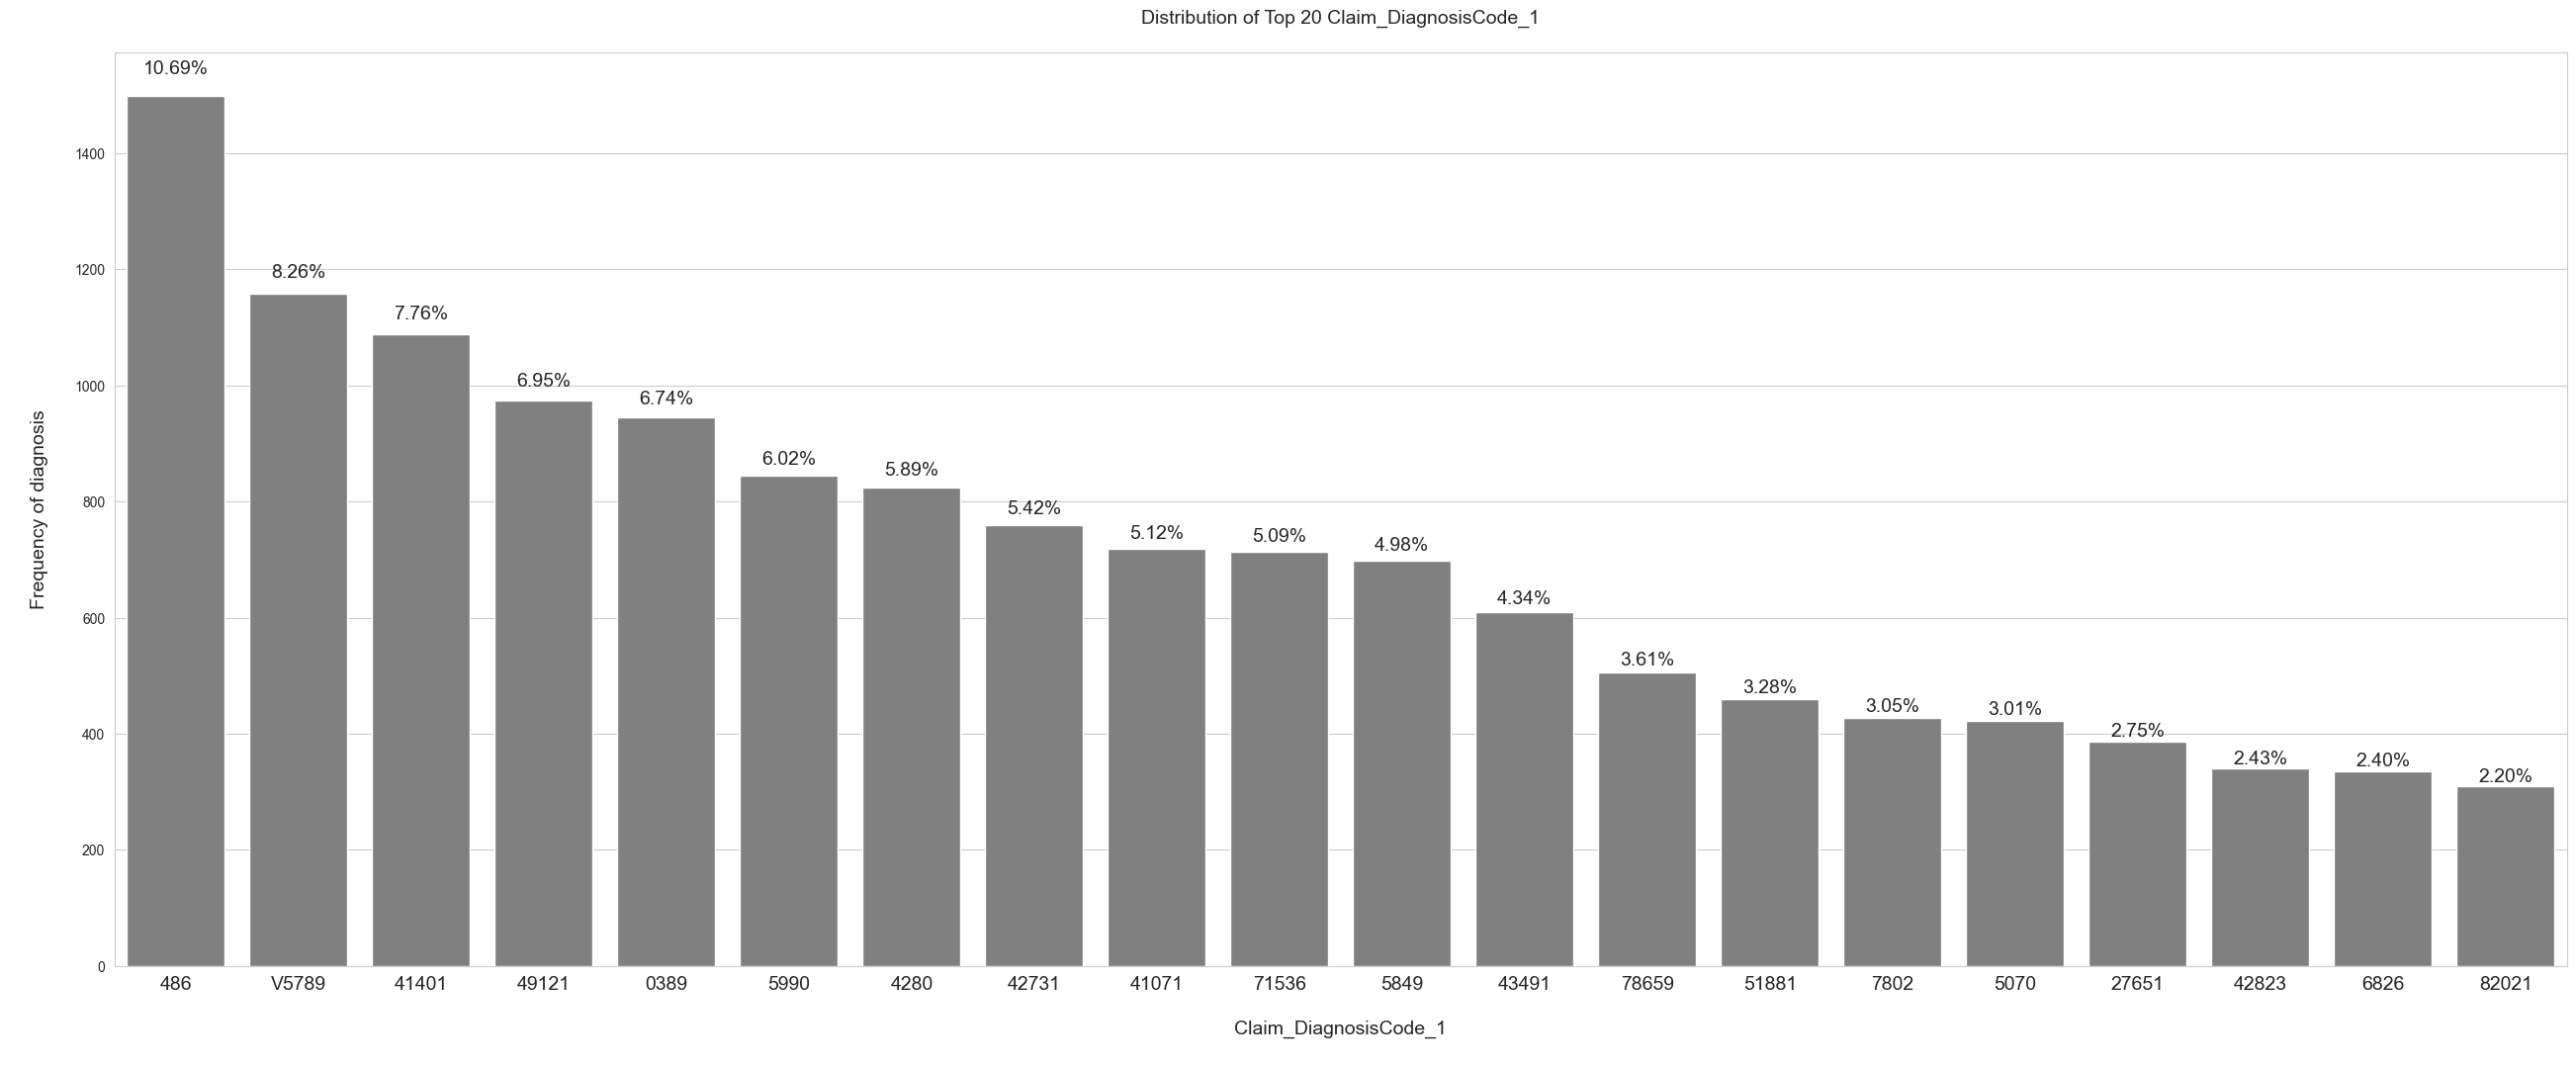

In [90]:

plt.figure(figsize = (32,12))
bar_top20_diag1 = sns.barplot(data = inp_top20_diag1, x = 'ClmDiagnosisCode_1', y = 'Frequency_of_diagnosis', palette = ['#808080'], order = sorted_inp_top20_diag1)
percent_top20_diag1 = [(i / sum(inp_top20_diag1['Frequency_of_diagnosis'])) * 100 for i in inp_top20_diag1['Frequency_of_diagnosis']]

for i, j in zip(bar_top20_diag1.patches, percent_top20_diag1):
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    
    bar_top20_diag1.annotate(f"{j:.2f}%", xy = (x + width/2, y + height*1.025), ha = 'center', fontsize = 14)

plt.title("Distribution of Top 20 Claim_DiagnosisCode_1\n", fontsize = 14)
plt.xlabel("\nClaim_DiagnosisCode_1\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)    
plt.show()
    

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_2 </b>
    </font>

In [91]:
train_Inpatient_data['ClmDiagnosisCode_2'].nunique()

2439

In [92]:
train_Inpatient_data['ClmDiagnosisCode_2'].isnull().sum()

np.int64(226)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_2 </b></i>
   </font>

In [93]:
inp_top20_diag2 = train_Inpatient_data['ClmDiagnosisCode_2'].value_counts(dropna = False).reset_index()
inp_top20_diag2.columns = ['ClmDiagnosisCode_2', 'Frequency_of_diagnosis']
inp_top20_diag2['ClmDiagnosisCode_2'] = inp_top20_diag2['ClmDiagnosisCode_2'].fillna('No_diagnosis')
inp_top20_diag2 = inp_top20_diag2.nlargest(20, 'Frequency_of_diagnosis')
inp_top20_diag2.head()

,ClmDiagnosisCode_2,Frequency_of_diagnosis
0,4019,2484
1,2724,1125
2,25000,1070
3,41401,806
4,42731,793


In [94]:
sorted_inp_top20_diag2 = inp_top20_diag2.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_2']

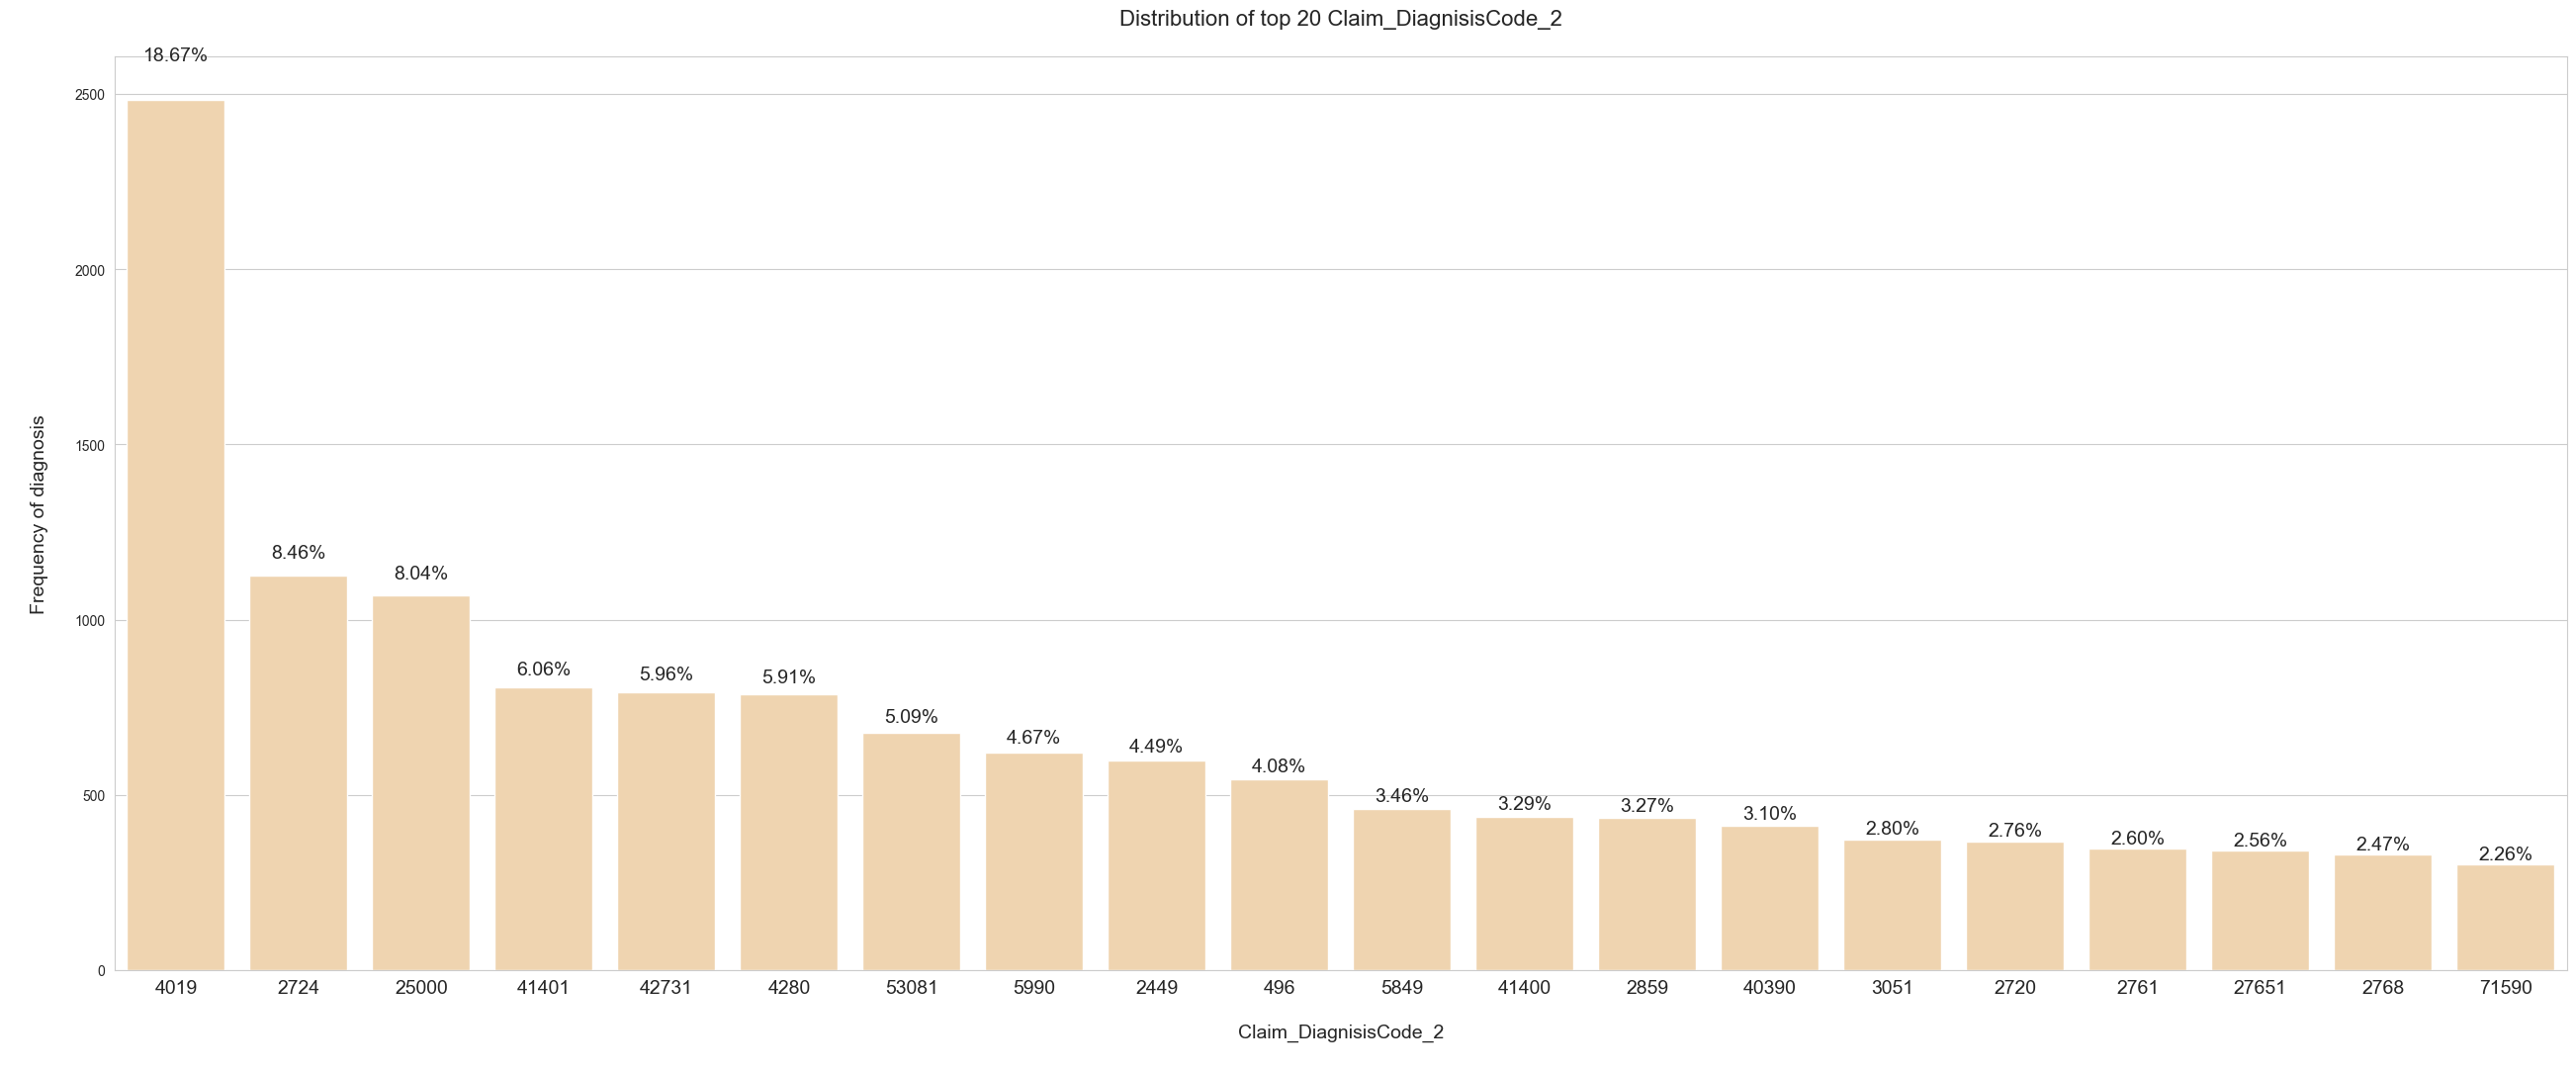

In [95]:
plt.figure(figsize = (32,12))
bar_top20_diag2 = sns.barplot(data = inp_top20_diag2, x = 'ClmDiagnosisCode_2', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag2, palette = ['#FAD5A5'])
percent_top20_diag2 = percent(inp_top20_diag2['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag2, percent_top20_diag2, plot_type = 'bar', label_space = 1.045, fontsize = 14)

plt.title("Distribution of top 20 Claim_DiagnisisCode_2\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnisisCode_2\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)    
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_3 </b>
    </font>

In [96]:
train_Inpatient_data['ClmDiagnosisCode_3'].nunique()

2427

In [97]:
train_Inpatient_data['ClmDiagnosisCode_3'].isnull().sum()

np.int64(676)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_3 </b></i>
   </font>

In [98]:
inp_top20_diag3 = train_Inpatient_data['ClmDiagnosisCode_3'].value_counts(dropna = False).reset_index()
inp_top20_diag3.columns = ['ClmDiagnosisCode_3', 'Frequency_of_diagnosis']
inp_top20_diag3['ClmDiagnosisCode_3'] = inp_top20_diag3['ClmDiagnosisCode_3'].fillna('No_diagnosis')
inp_top20_diag3 = inp_top20_diag3.nlargest(20, columns = 'Frequency_of_diagnosis')
inp_top20_diag3.head()

,ClmDiagnosisCode_3,Frequency_of_diagnosis
0,4019,2282
1,25000,1108
2,2724,1097
3,4280,815
4,41401,741


In [99]:
sorted_inp_top20_diag3 = inp_top20_diag3.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_3']

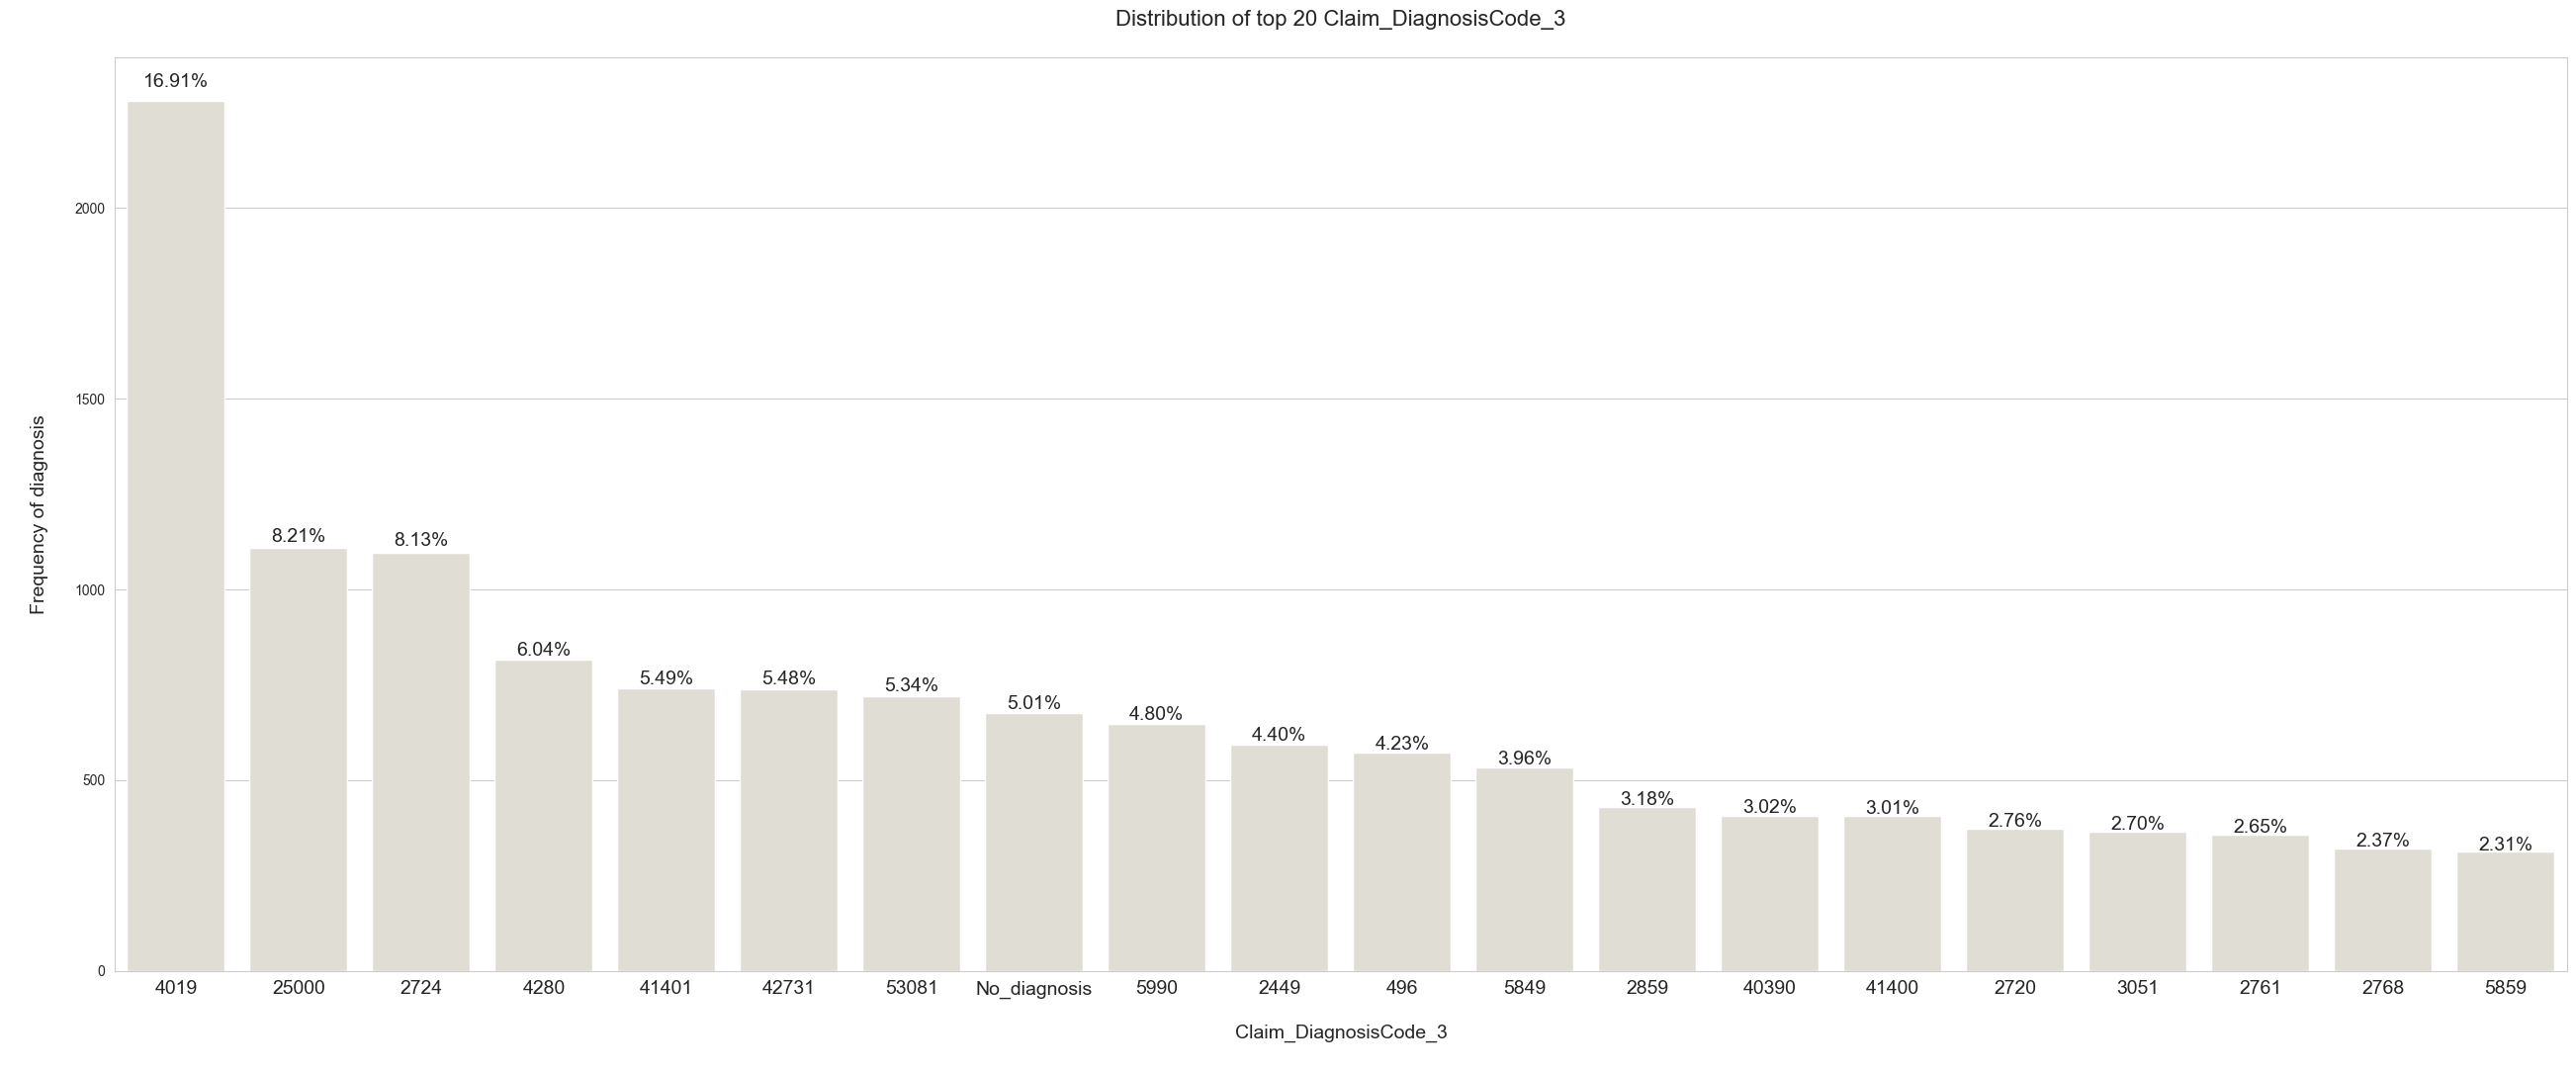

In [100]:
plt.figure(figsize = (32,12))
bar_top20_diag3 = sns.barplot(inp_top20_diag3, x = 'ClmDiagnosisCode_3', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag3, palette = ['#E2DFD2'])
percent_top20_diag3 = percent(inp_top20_diag3['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag3, percent_top20_diag3, fontsize = 14)

plt.title("Distribution of top 20 Claim_DiagnosisCode_3\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnosisCode_3\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
   <b> Explore ClmDiagnosisCode_4 </b>

In [101]:
train_Inpatient_data['ClmDiagnosisCode_4'].nunique()

2441

In [102]:
train_Inpatient_data['ClmDiagnosisCode_4'].isnull().sum()

np.int64(1534)

<font color = "#000000" size = 3px>
   <b><i> Top 50 ClmDiagnosisCode_4 </b></i>
   </font>

In [103]:
inp_top20_diag4 = train_Inpatient_data['ClmDiagnosisCode_4'].value_counts(dropna = False).reset_index()
inp_top20_diag4.columns = ['ClmDiagnosisCode_4', 'Frequency_of_diagnosis']
inp_top20_diag4['ClmDiagnosisCode_4'] = inp_top20_diag4['ClmDiagnosisCode_4'].fillna('No_diagnosis')
inp_top20_diag4 = inp_top20_diag4.nlargest(20, columns = 'Frequency_of_diagnosis')
inp_top20_diag4.head()

,ClmDiagnosisCode_4,Frequency_of_diagnosis
0,4019,2100
1,No_diagnosis,1534
2,2724,1028
3,25000,1015
4,41401,759


In [104]:
sorted_inp_top20_diag4 = inp_top20_diag4.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_4']

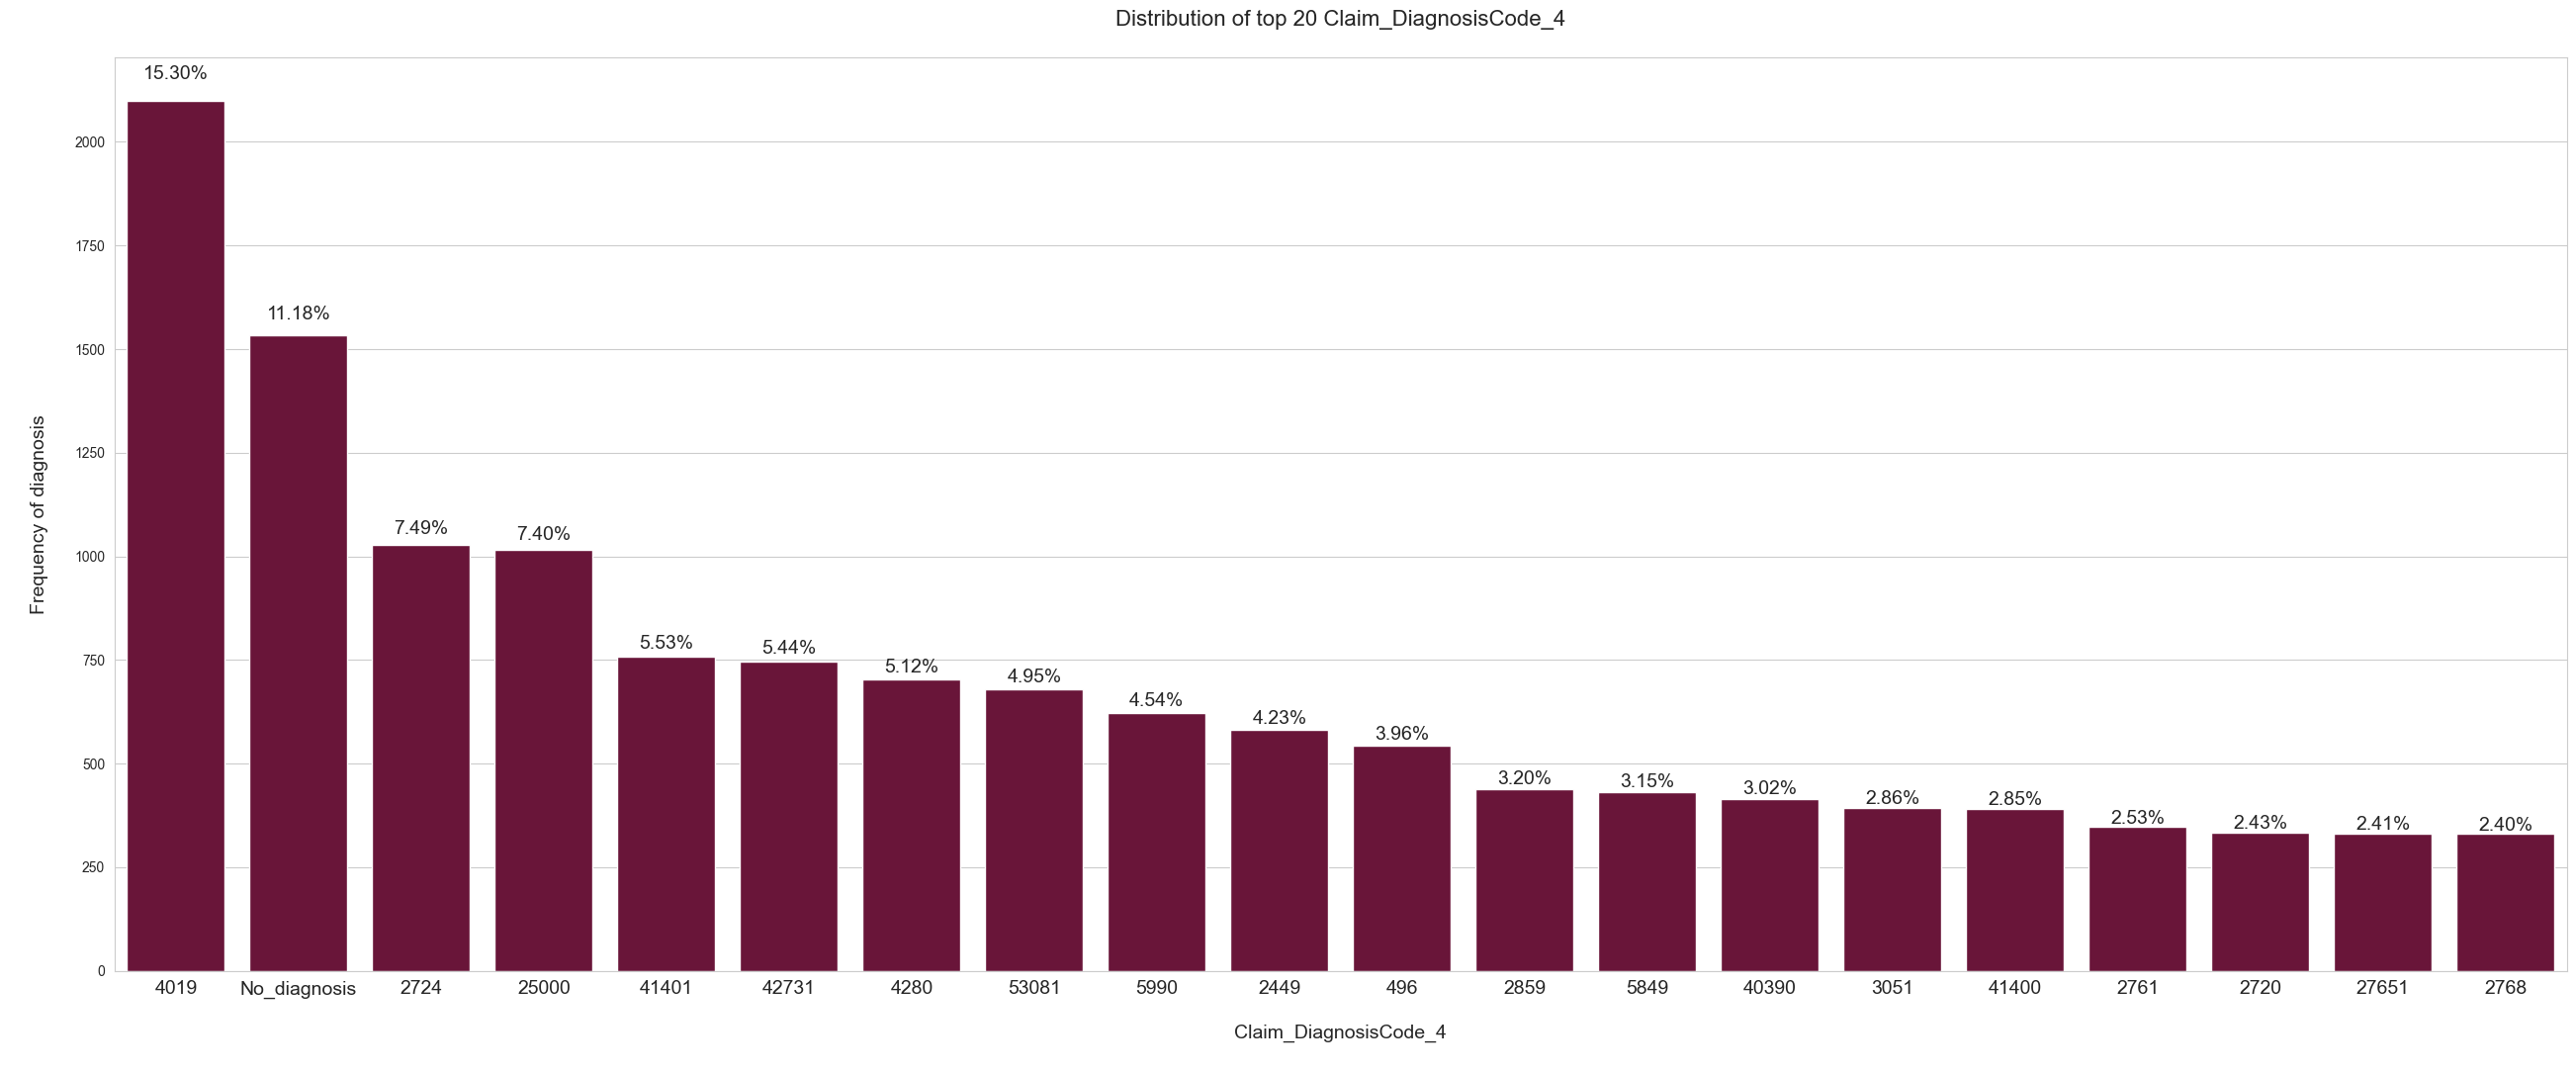

In [105]:
plt.figure(figsize = (32,12))
bar_top20_diag4 = sns.barplot(inp_top20_diag4, x = 'ClmDiagnosisCode_4', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag4, palette = ['#770737'])
percent_top20_diag4 = percent(inp_top20_diag4['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag4, percent_top20_diag4, fontsize = 14, label_space = 1.025)

plt.title("Distribution of top 20 Claim_DiagnosisCode_4\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnosisCode_4\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
   <b>Explore ClmDiagnosisCode_5</b>
   </font>

In [106]:
train_Inpatient_data['ClmDiagnosisCode_5'].nunique()

2374

In [107]:
train_Inpatient_data['ClmDiagnosisCode_5'].isnull().sum()

np.int64(2894)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_5 </b></i>
   </font>

In [108]:
inp_top20_diag5 = train_Inpatient_data['ClmDiagnosisCode_5'].value_counts(dropna = False).reset_index()
inp_top20_diag5.columns = ['ClmDiagnosisCode_5', 'Frequency_of_diagnosis']
inp_top20_diag5['ClmDiagnosisCode_5'] = inp_top20_diag5['ClmDiagnosisCode_5'].fillna('No_diagnosis')
inp_top20_diag5 = inp_top20_diag5.nlargest(20, 'Frequency_of_diagnosis')
inp_top20_diag5.head()

,ClmDiagnosisCode_5,Frequency_of_diagnosis
0,No_diagnosis,2894
1,4019,1889
2,2724,1000
3,25000,978
4,41401,702


In [109]:
sorted_inp_top20_diag5 = inp_top20_diag5.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_5']

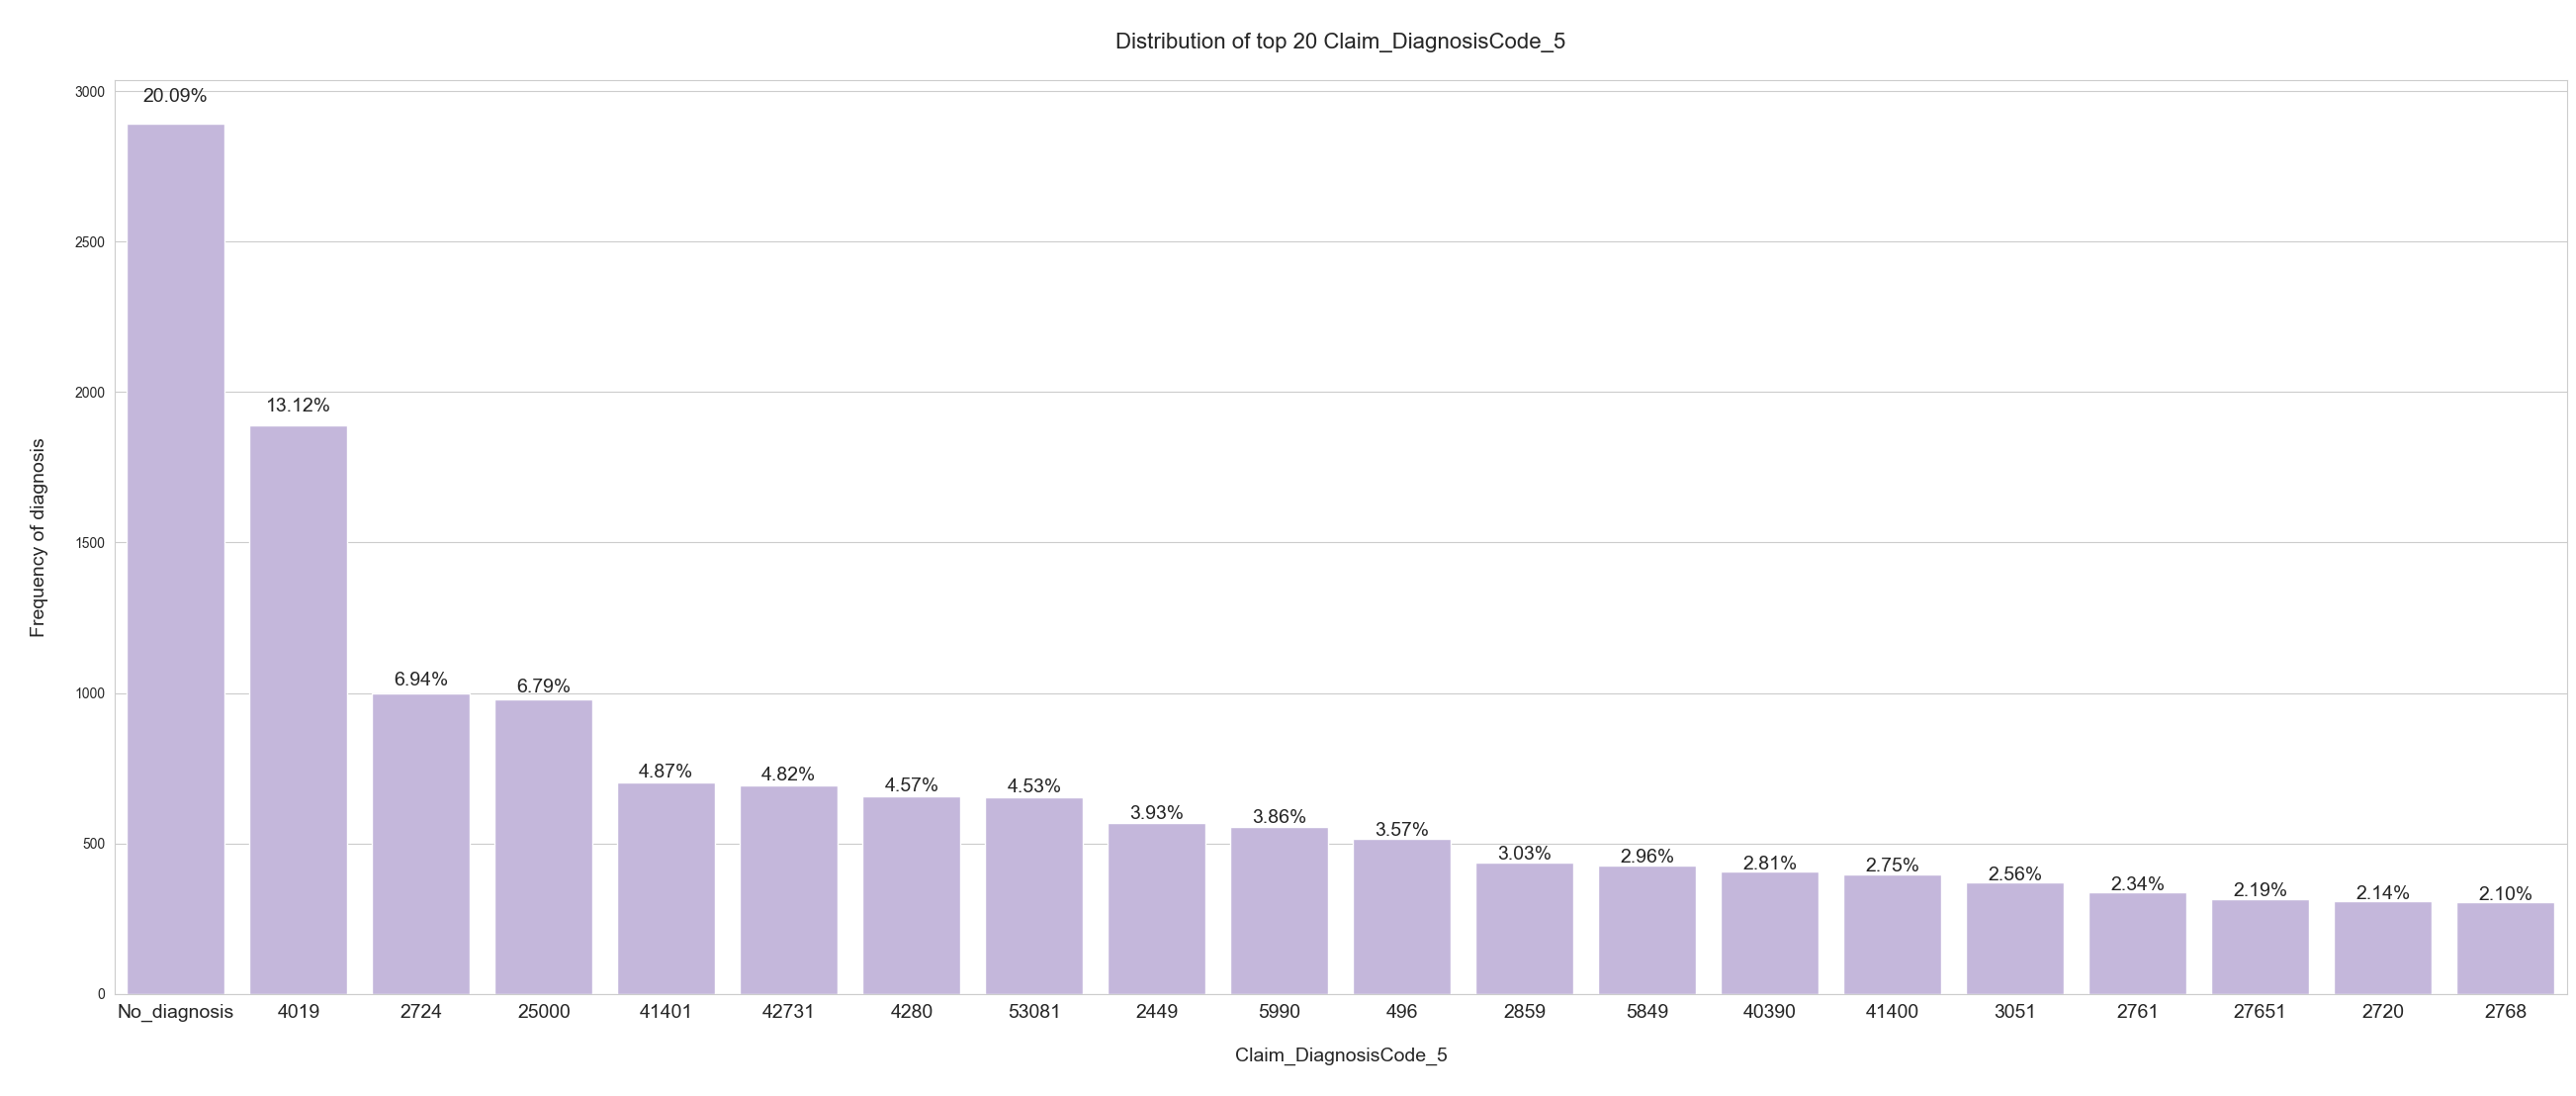

In [110]:
plt.figure(figsize = (32,12))
bar_top20_diag5 = sns.barplot(inp_top20_diag5, x = 'ClmDiagnosisCode_5', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag5, palette = ['#C3B1E1'])
percent_top20_diag5 = percent(inp_top20_diag5['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag5, percent_top20_diag5, fontsize = 14, label_space = 1.025)

plt.title("\nDistribution of top 20 Claim_DiagnosisCode_5\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnosisCode_5\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_6 </b>
    </font>

In [111]:
train_Inpatient_data['ClmDiagnosisCode_6'].nunique()

2358

In [112]:
train_Inpatient_data['ClmDiagnosisCode_6'].isnull().sum()

np.int64(4838)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_6 </b></i>
   </font>

In [113]:
inp_top20_diag6 = train_Inpatient_data['ClmDiagnosisCode_6'].value_counts(dropna = False).reset_index()
inp_top20_diag6.columns = ['ClmDiagnosisCode_6', 'Frequency_of_diagnosis']
inp_top20_diag6['ClmDiagnosisCode_6'] = inp_top20_diag6['ClmDiagnosisCode_6'].fillna("No_diagnosis")
inp_top20_diag6 = inp_top20_diag6.nlargest(20, 'Frequency_of_diagnosis')
inp_top20_diag6.head()

,ClmDiagnosisCode_6,Frequency_of_diagnosis
0,No_diagnosis,4838
1,4019,1620
2,25000,911
3,2724,903
4,4280,692


In [114]:
sorted_inp_top20_diag6 = inp_top20_diag6.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_6']

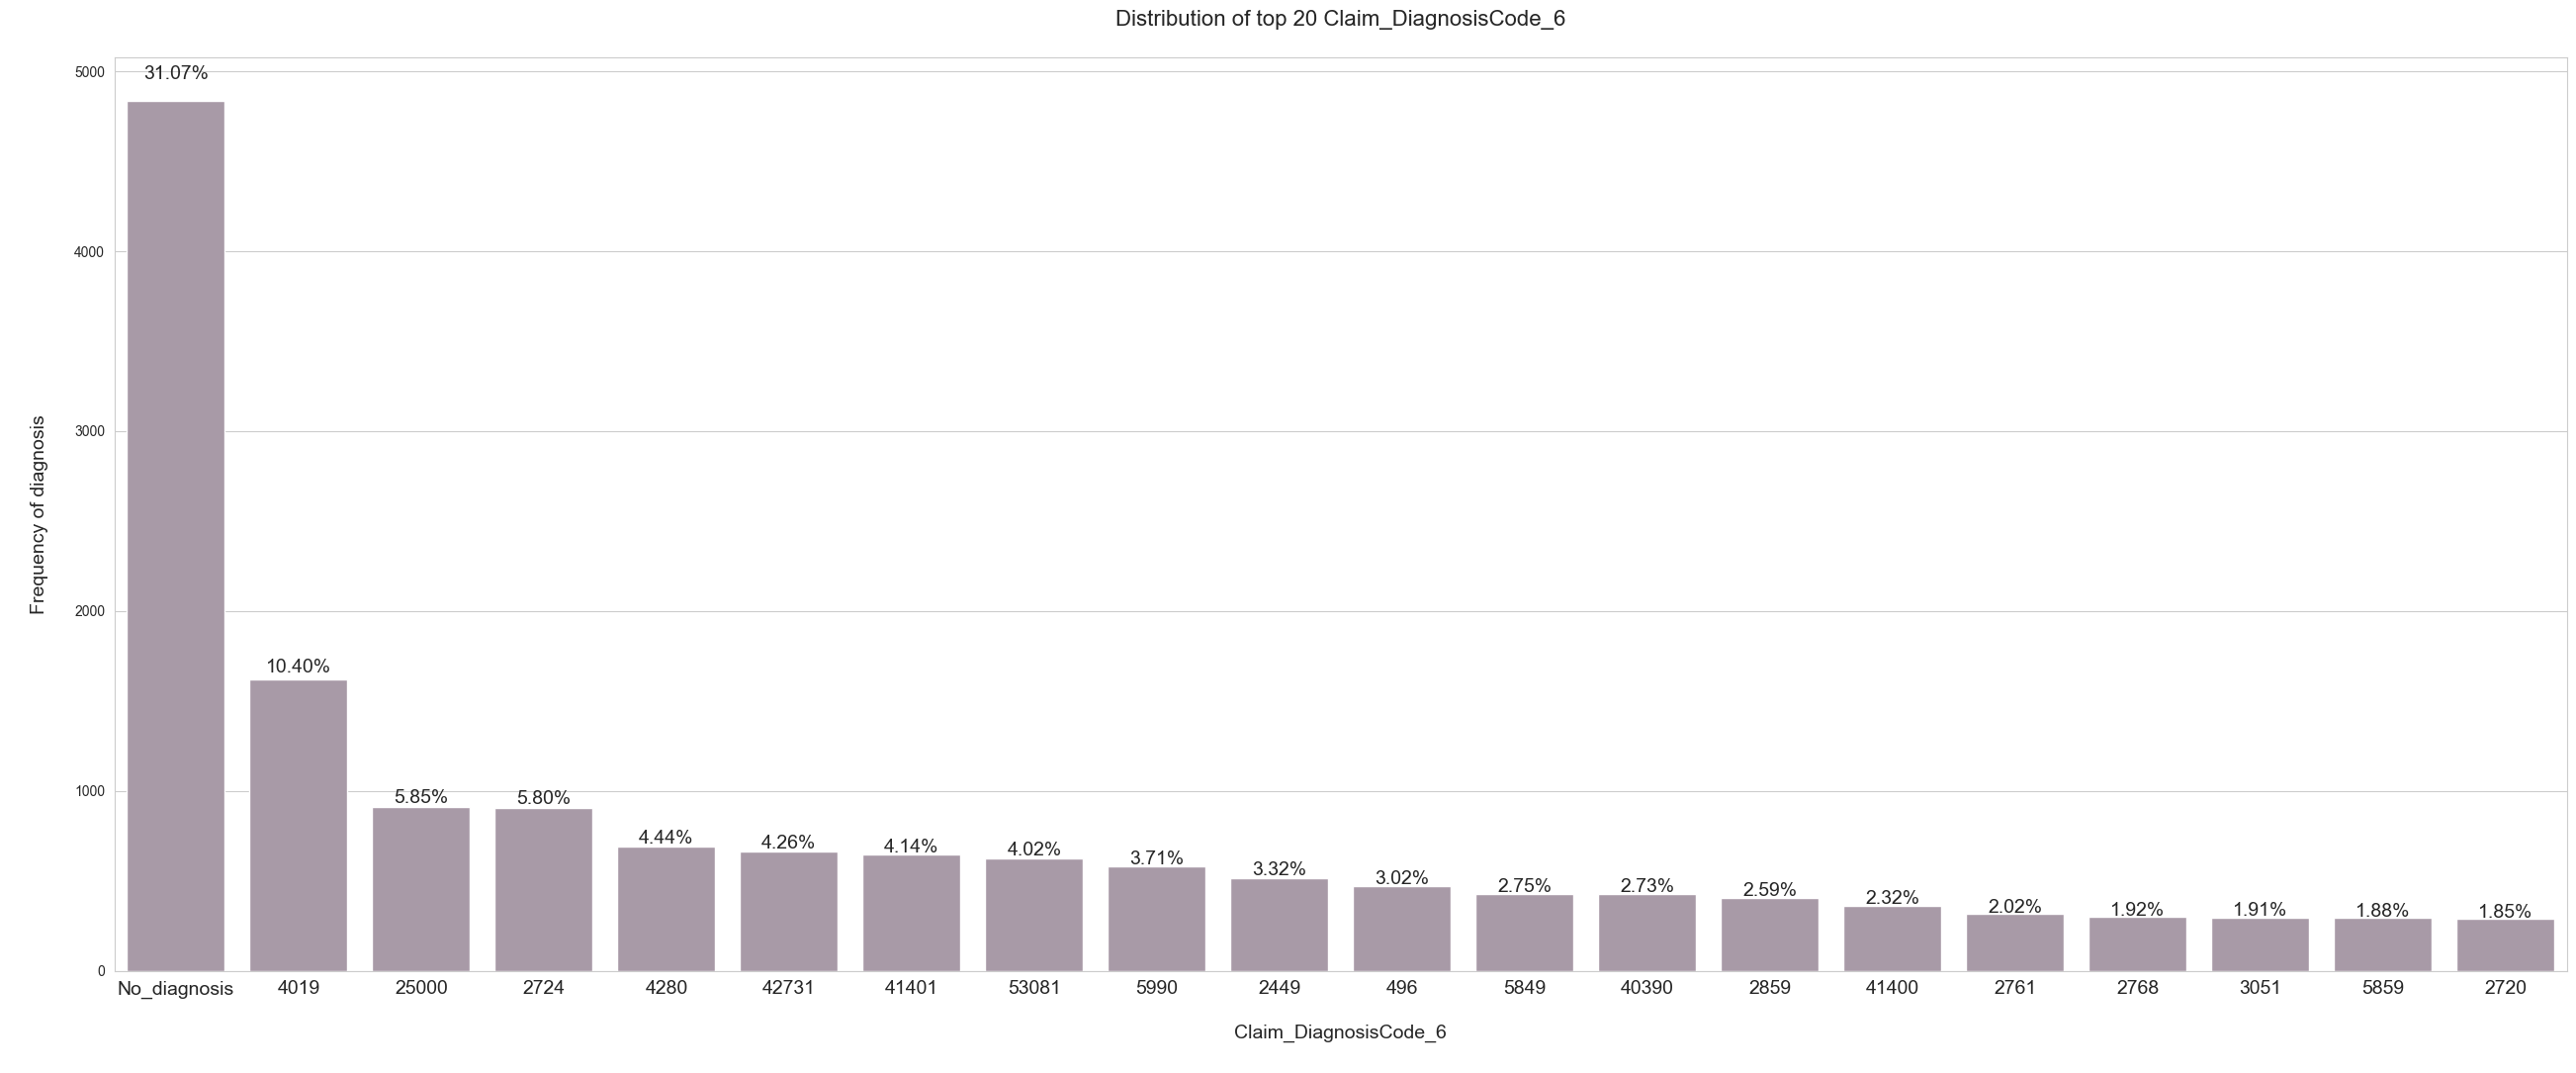

In [115]:
plt.figure(figsize = (32,12))
bar_top20_diag6 = sns.barplot(inp_top20_diag6, x = 'ClmDiagnosisCode_6', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag6, palette = ['#AA98A9'])
percent_top20_diag6 = percent(inp_top20_diag6['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag6, percent_top20_diag6, fontsize = 14, label_space = 1.025)

plt.title("Distribution of top 20 Claim_DiagnosisCode_6\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnosisCode_6\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_7</b>
    </font>

In [116]:
train_Inpatient_data['ClmDiagnosisCode_7'].nunique()

2310

In [117]:
train_Inpatient_data['ClmDiagnosisCode_7'].isnull().sum()

np.int64(7258)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_7 </b></i>
   </font>

In [118]:
inp_top20_diag7 = train_Inpatient_data['ClmDiagnosisCode_7'].value_counts(dropna = False).reset_index()
inp_top20_diag7.columns = ['ClmDiagnosisCode_7', 'Frequency_of_diagnosis']
inp_top20_diag7['ClmDiagnosisCode_7'] = inp_top20_diag7['ClmDiagnosisCode_7'].fillna('No_diagnosis')
inp_top20_diag7 = inp_top20_diag7.nlargest(20, 'Frequency_of_diagnosis')
inp_top20_diag7.head()

,ClmDiagnosisCode_7,Frequency_of_diagnosis
0,No_diagnosis,7258
1,4019,1402
2,25000,819
3,2724,803
4,41401,613


In [119]:
sorted_inp_top20_diag7 = inp_top20_diag7.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_7']

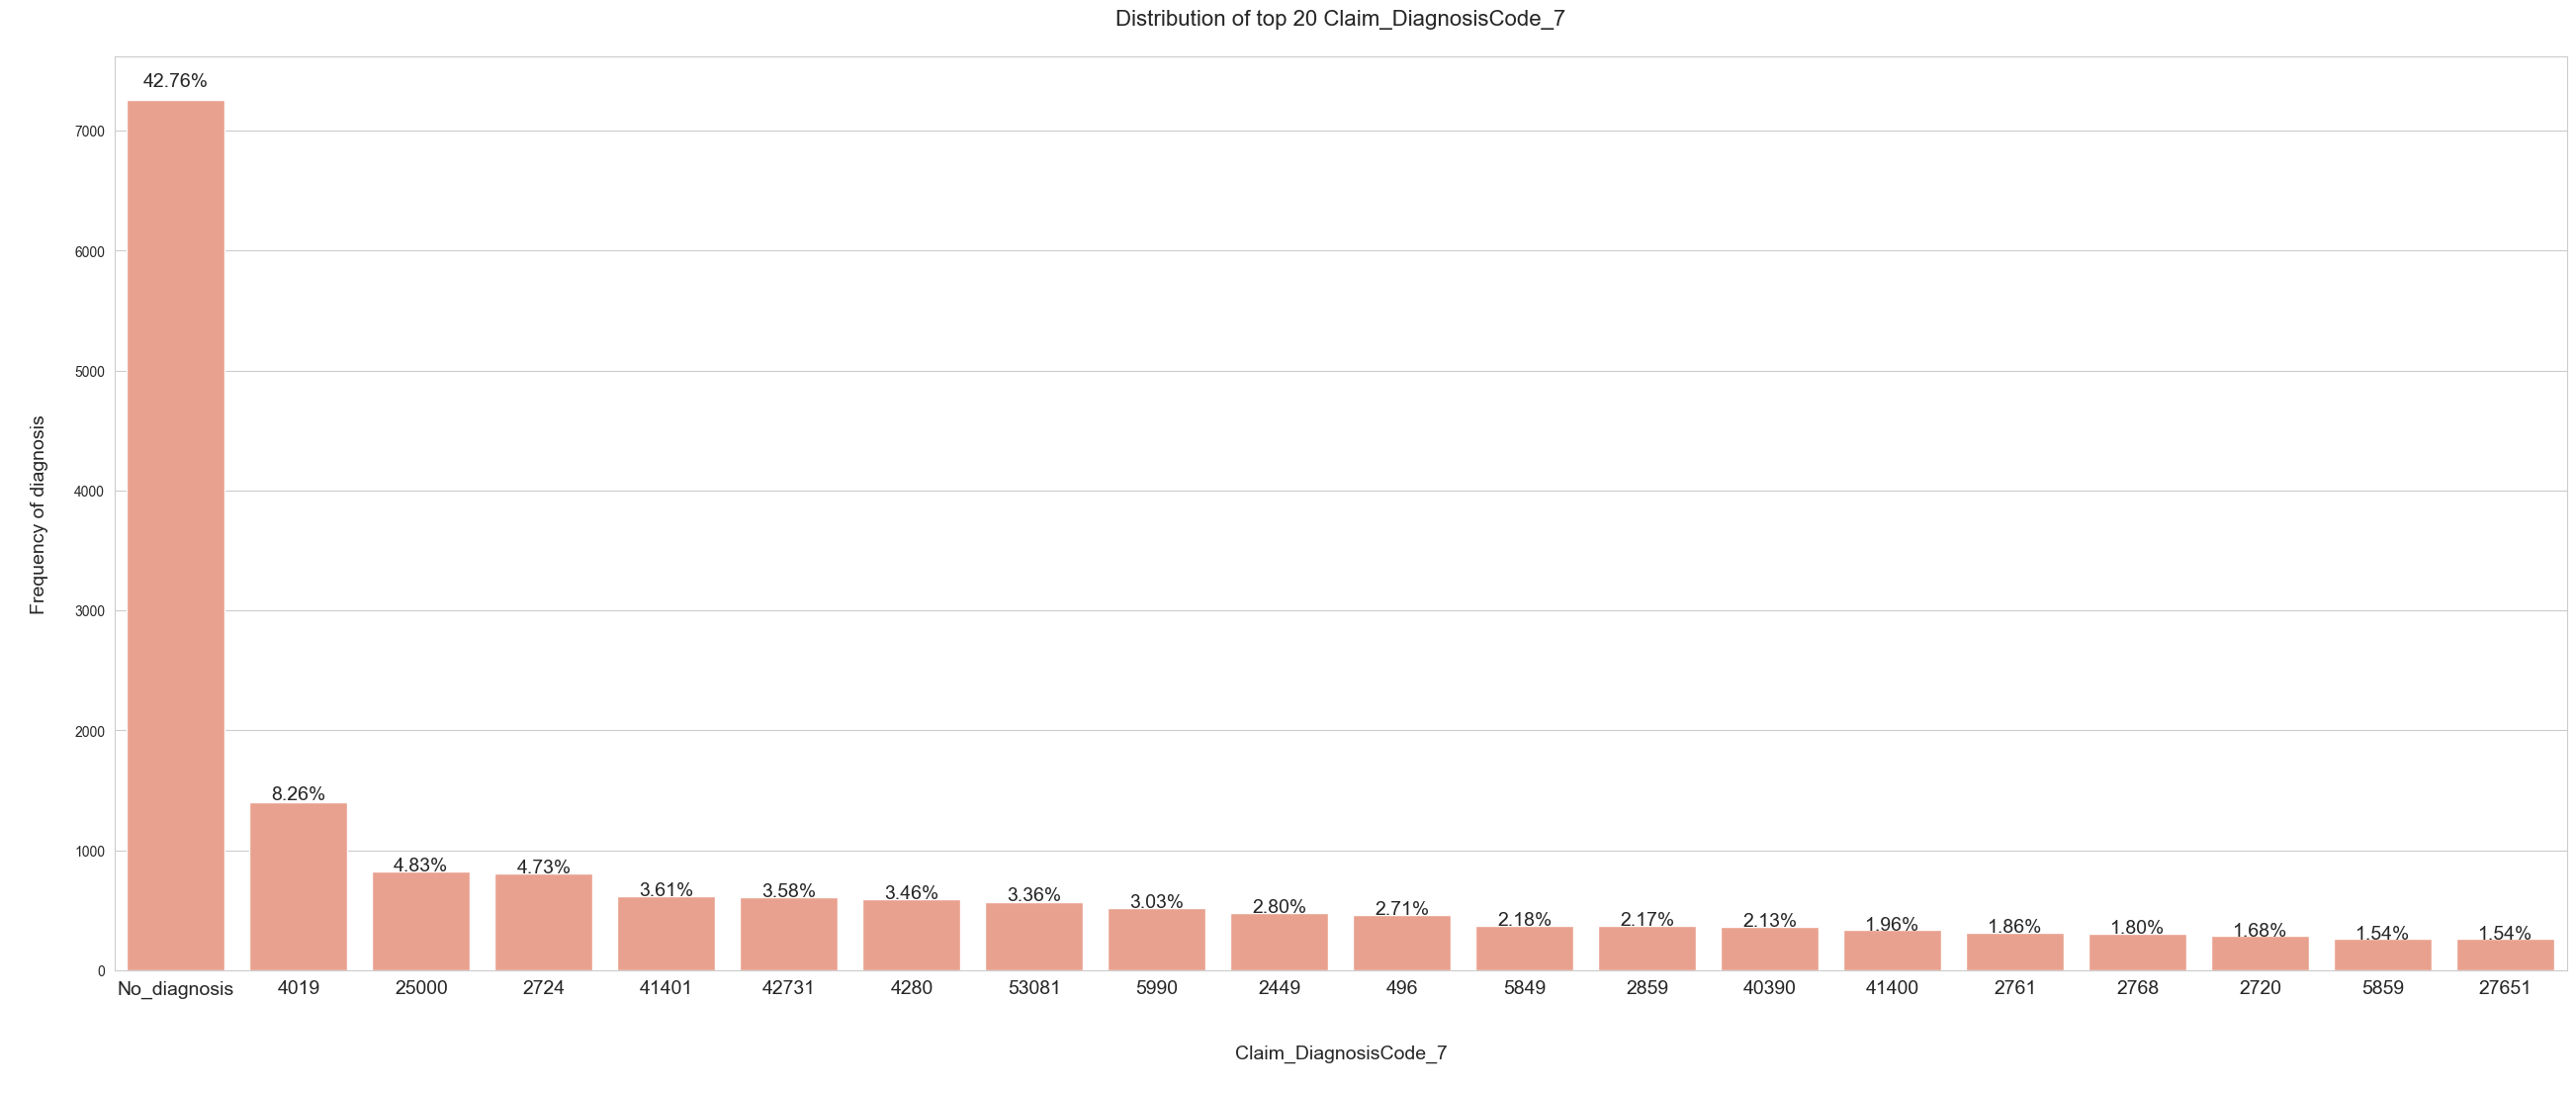

In [120]:
plt.figure(figsize = (32,12))
bar_top20_diag7 = sns.barplot(inp_top20_diag7, x = 'ClmDiagnosisCode_7', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag7, palette = ['#F89880'])
percent_top20_diag7 = percent(inp_top20_diag7['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag7, percent_top20_diag7, fontsize = 14, label_space = 1.015)

plt.title("Distribution of top 20 Claim_DiagnosisCode_7\n", fontsize = 16)
plt.xlabel("\n\nClaim_DiagnosisCode_7\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_8</b>
    </font>

In [121]:
train_Inpatient_data['ClmDiagnosisCode_8'].nunique()

2243

In [122]:
train_Inpatient_data['ClmDiagnosisCode_8'].isnull().sum()

np.int64(9942)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_8 </b></i>
   </font>

In [123]:
inp_top20_diag8 = train_Inpatient_data['ClmDiagnosisCode_8'].value_counts(dropna = False).reset_index()
inp_top20_diag8.columns = ['ClmDiagnosisCode_8', 'Frequency_of_diagnosis']
inp_top20_diag8['ClmDiagnosisCode_8'] = inp_top20_diag8['ClmDiagnosisCode_8'].fillna("No_diagnosis")
inp_top20_diag8 = inp_top20_diag8.nlargest(20, 'Frequency_of_diagnosis')
inp_top20_diag8.head()

,ClmDiagnosisCode_8,Frequency_of_diagnosis
0,No_diagnosis,9942
1,4019,1200
2,25000,697
3,2724,662
4,41401,553


In [124]:
sorted_inp_top20_diag8 = inp_top20_diag8.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_8']

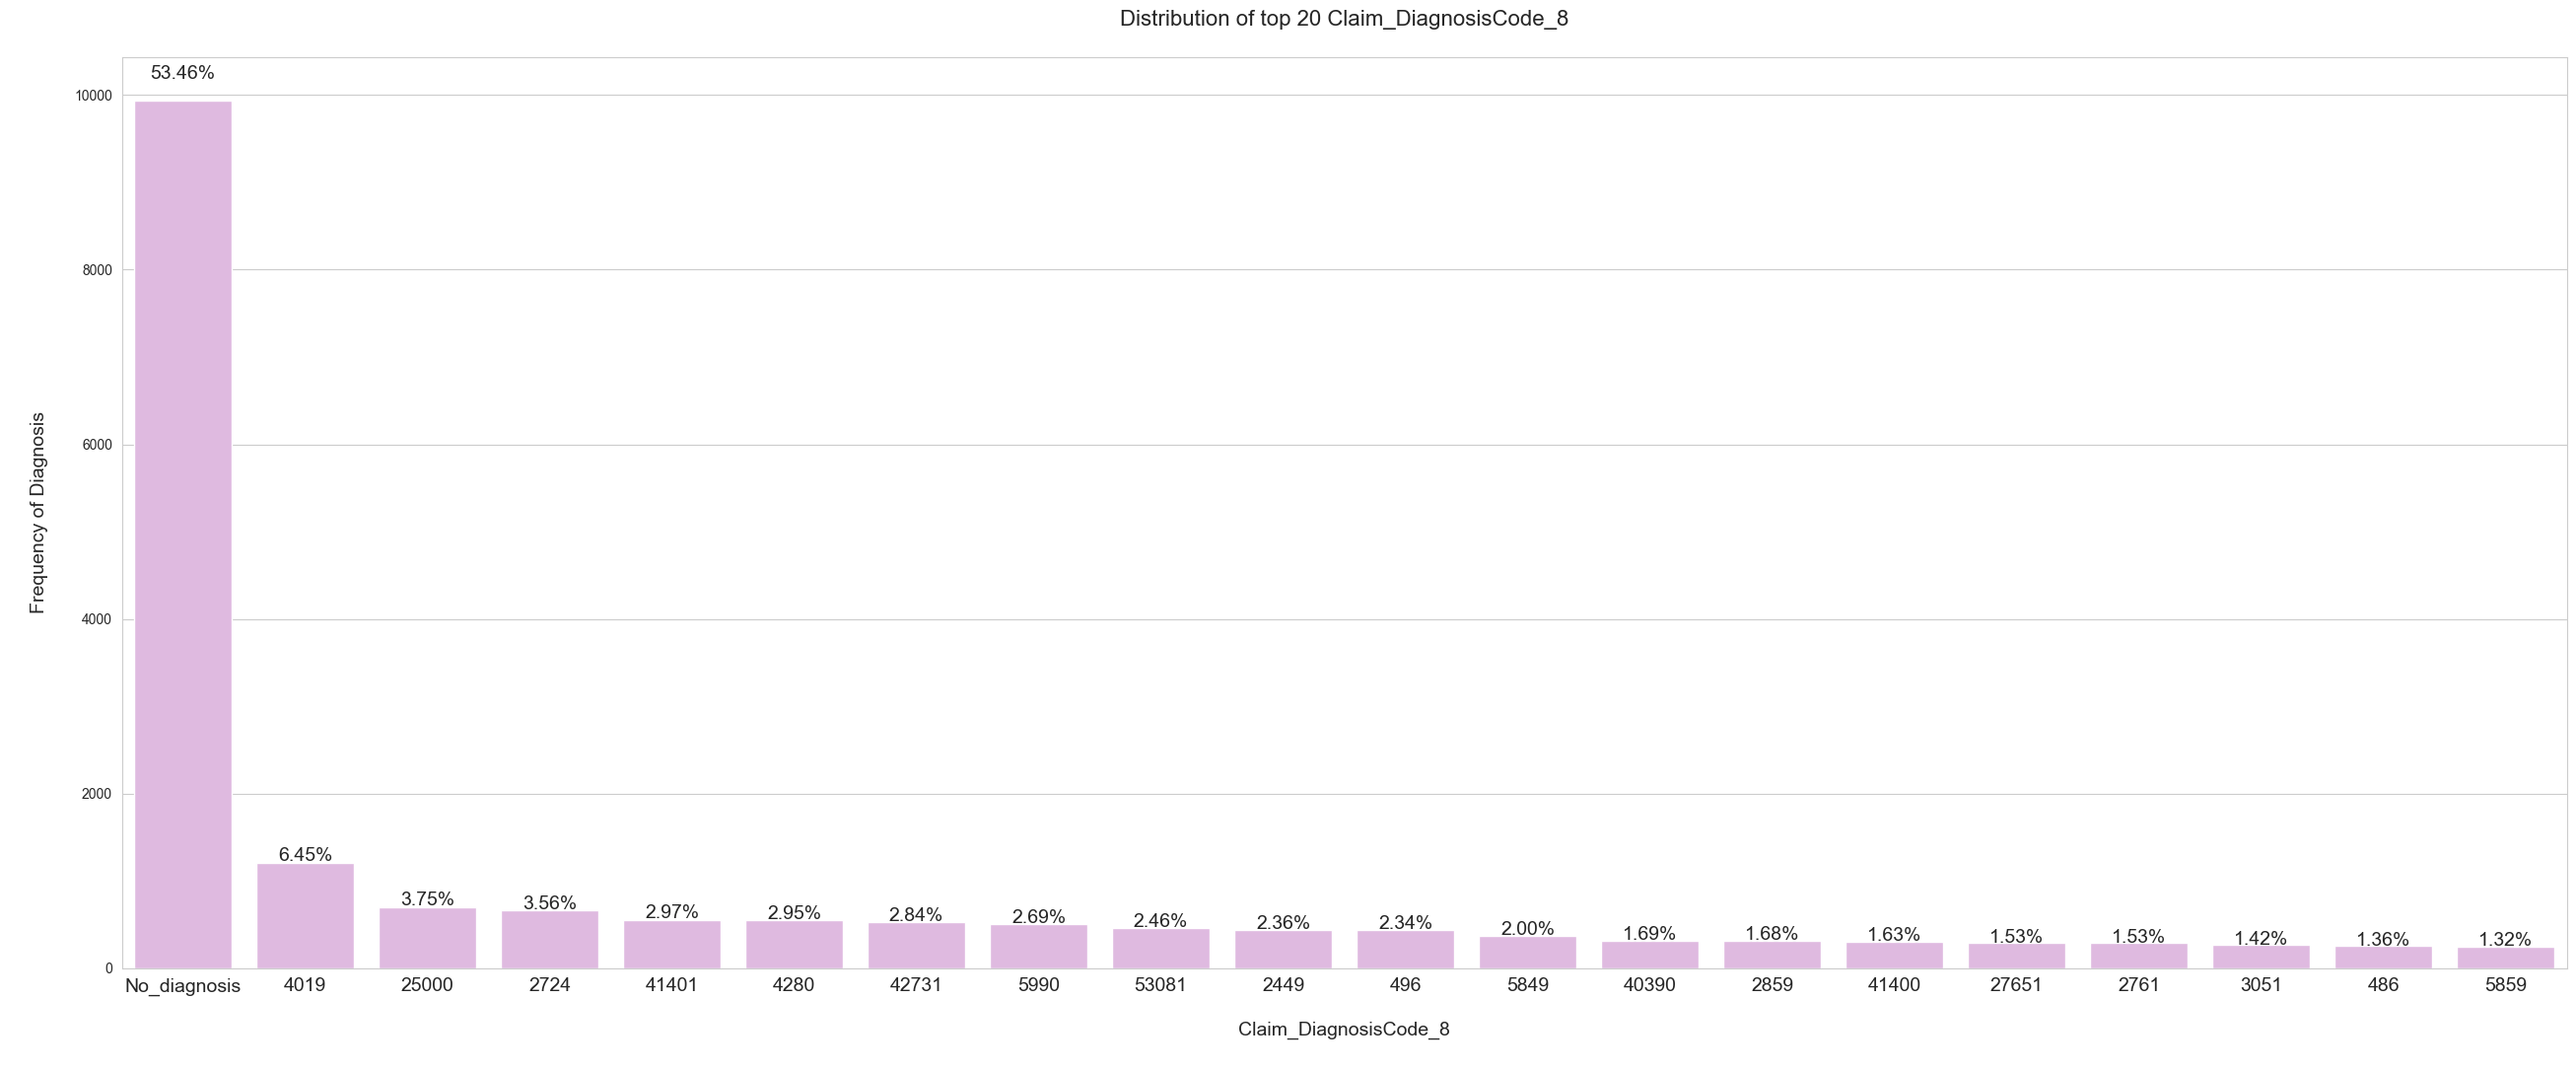

In [125]:
plt.figure(figsize = (32,12))
bar_top20_diag8 = sns.barplot(inp_top20_diag8, x = 'ClmDiagnosisCode_8', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag8, palette = ['#e5b4e6'])
percent_top20_diag8 = percent(inp_top20_diag8['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag8, percent_top20_diag8, fontsize = 14, label_space = 1.025)

plt.title("Distribution of top 20 Claim_DiagnosisCode_8\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnosisCode_8\n", fontsize = 14)
plt.ylabel("\nFrequency of Diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_9</b>
    </font>

In [126]:
train_Inpatient_data['ClmDiagnosisCode_9'].nunique()

2094

In [127]:
train_Inpatient_data['ClmDiagnosisCode_9'].isnull().sum()

np.int64(13497)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_9 </b></i>
   </font>

In [128]:
inp_top20_diag9 = train_Inpatient_data['ClmDiagnosisCode_9'].value_counts(dropna = False).reset_index()
inp_top20_diag9.columns = ['ClmDiagnosisCode_9', 'Frequency_of_diagnosis']
inp_top20_diag9['ClmDiagnosisCode_9'] = inp_top20_diag9['ClmDiagnosisCode_9'].fillna("No_diagnosis")
inp_top20_diag9 = inp_top20_diag9.nlargest(20, 'Frequency_of_diagnosis')
inp_top20_diag9.head()

,ClmDiagnosisCode_9,Frequency_of_diagnosis
0,No_diagnosis,13497
1,4019,965
2,2724,633
3,25000,632
4,4280,494


In [129]:
sorted_inp_top20_diag9 = inp_top20_diag9.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_9']

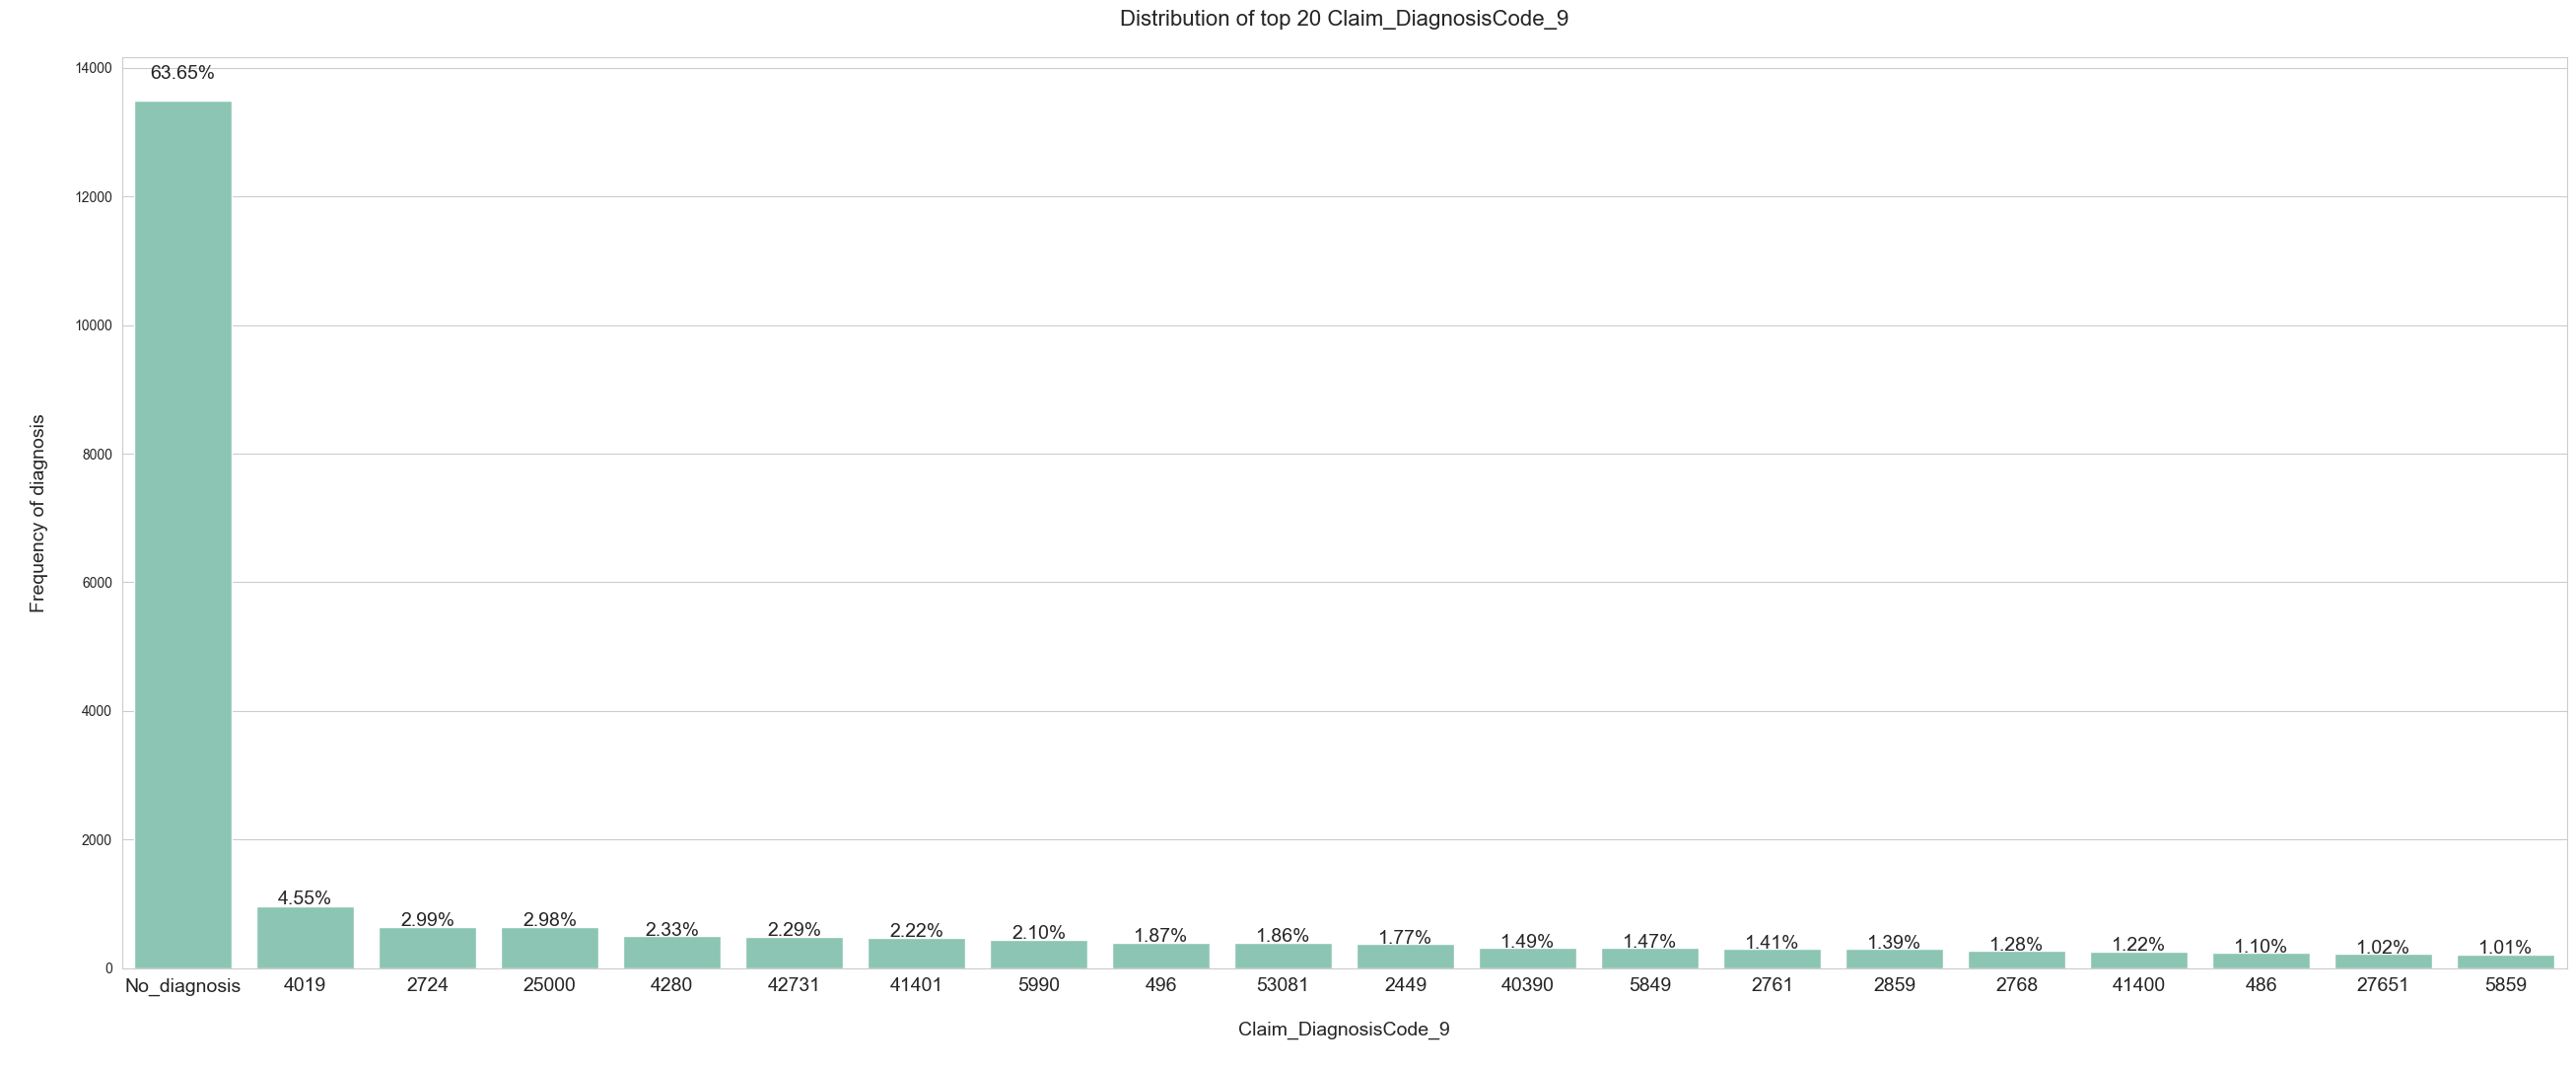

In [130]:
plt.figure(figsize = (32,12))
bar_top20_diag9 = sns.barplot(inp_top20_diag9, x = 'ClmDiagnosisCode_9', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag9, palette = ['#83ceb7'])
percent_top20_diag9 = percent(inp_top20_diag9['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag9, percent_top20_diag9, fontsize = 14, label_space = 1.025)

plt.title("Distribution of top 20 Claim_DiagnosisCode_9\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnosisCode_9\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

<font color = "#000000" size = 4px>
    <b>Explore ClmDiagnosisCode_10</b>
    </font>

In [131]:
train_Inpatient_data['ClmDiagnosisCode_10'].nunique()

952

In [132]:
train_Inpatient_data['ClmDiagnosisCode_10'].isnull().sum()

np.int64(36547)

<font color = "#000000" size = 3px>
   <b><i> Top 20 ClmDiagnosisCode_10 </b></i>
   </font>

In [133]:
inp_top20_diag10 = train_Inpatient_data['ClmDiagnosisCode_10'].value_counts(dropna = False).reset_index()
inp_top20_diag10.columns = ['ClmDiagnosisCode_10', 'Frequency_of_diagnosis']
inp_top20_diag10['ClmDiagnosisCode_10'] = inp_top20_diag10['ClmDiagnosisCode_10'].fillna("No_diagnosis")
inp_top20_diag10 = inp_top20_diag10.nlargest(20, 'Frequency_of_diagnosis')
inp_top20_diag10.head()

,ClmDiagnosisCode_10,Frequency_of_diagnosis
0,No_diagnosis,36547
1,4019,128
2,25000,90
3,2724,86
4,4280,81


In [134]:
sorted_inp_top20_diag10 = inp_top20_diag10.sort_values('Frequency_of_diagnosis', ascending = False)['ClmDiagnosisCode_10']

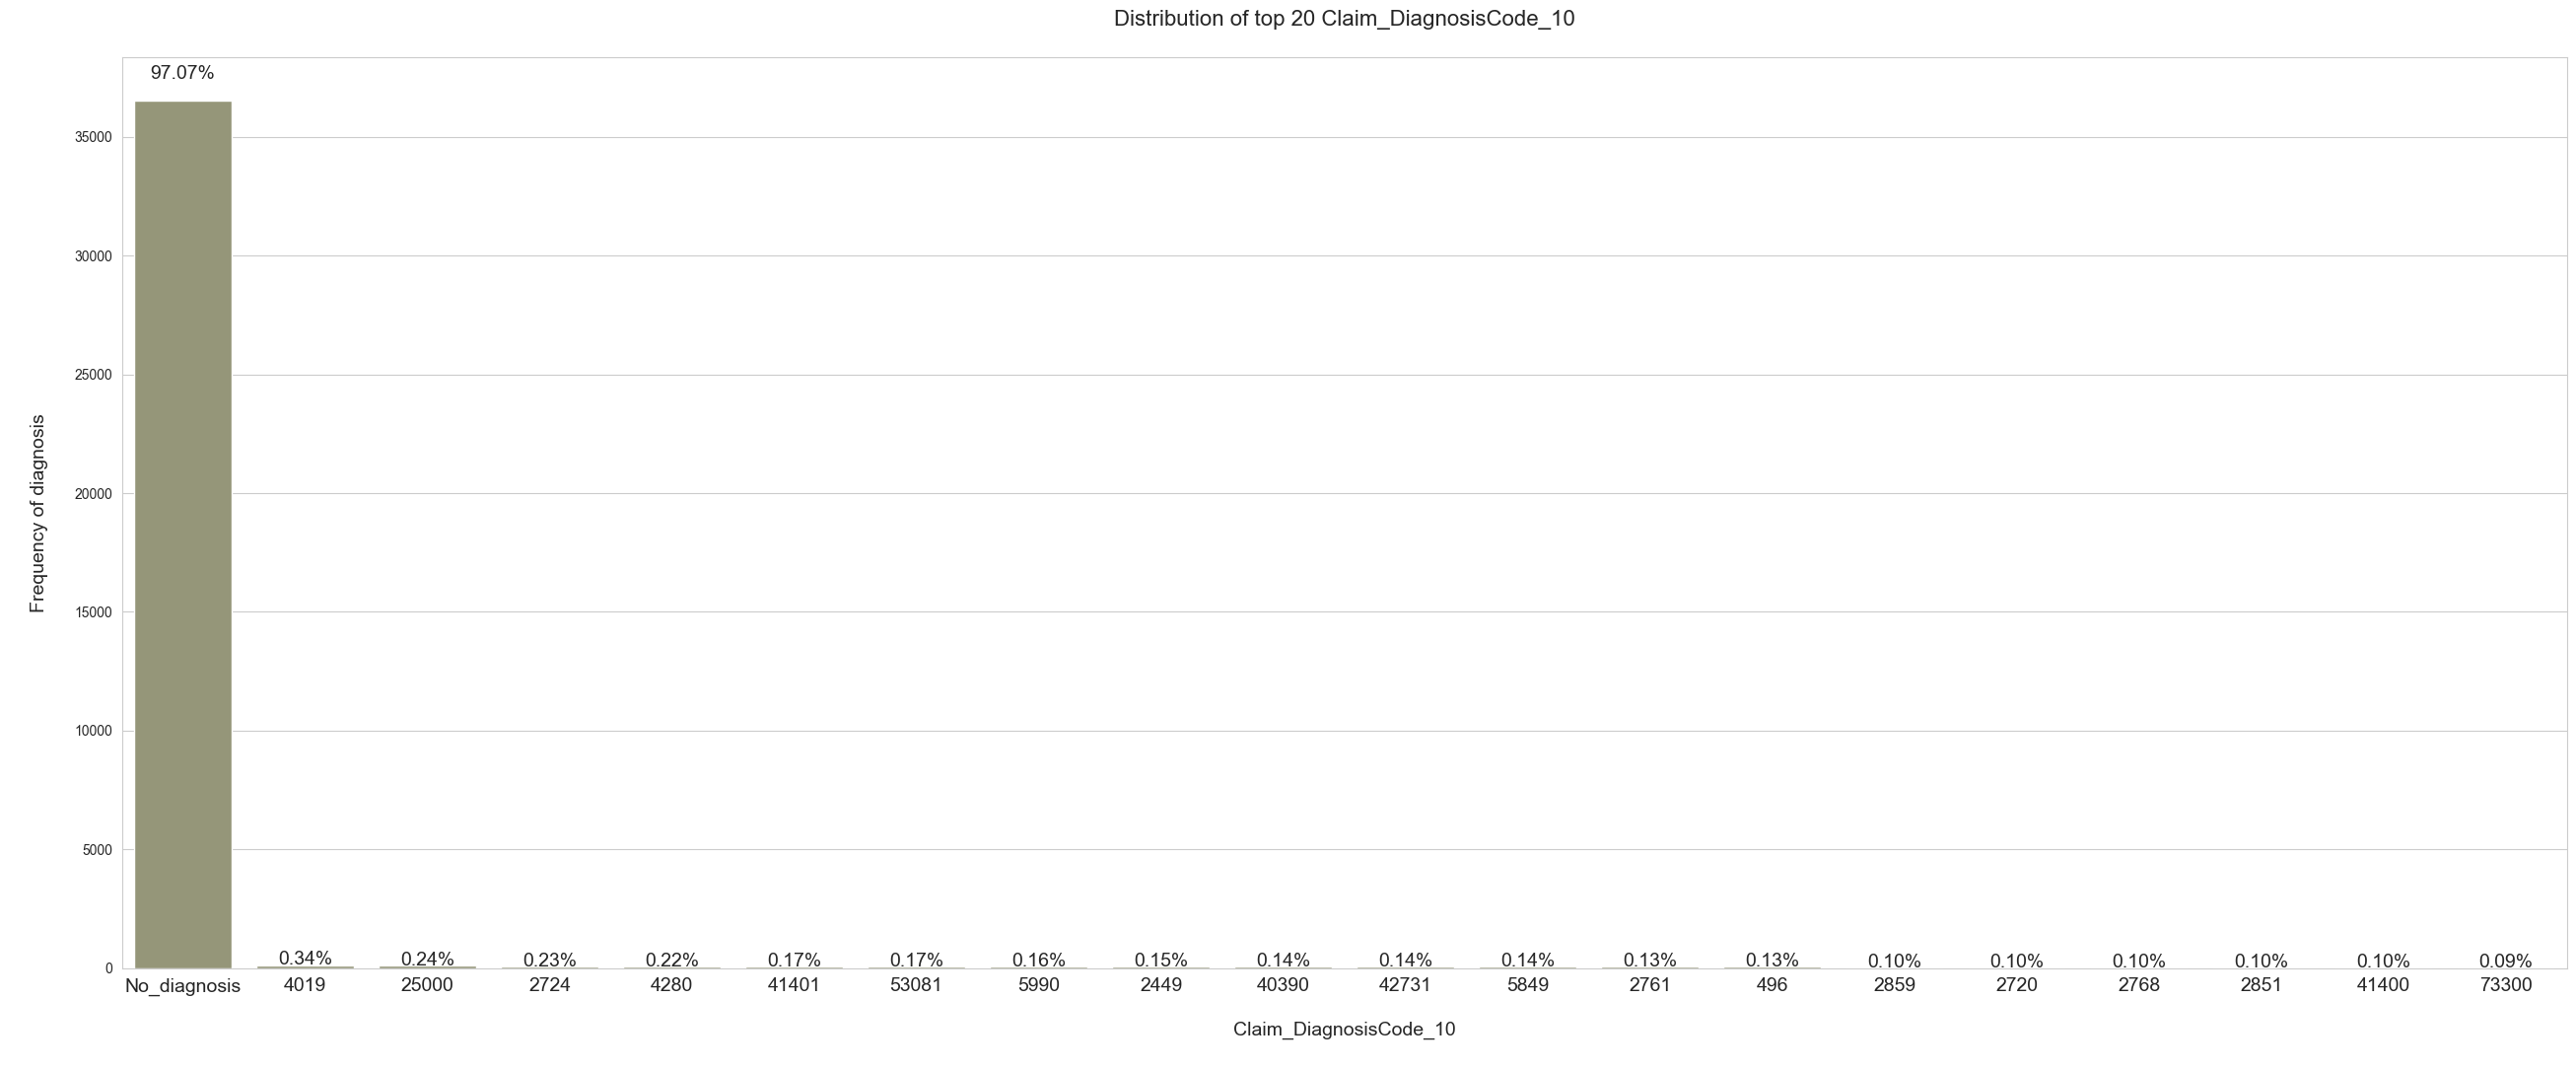

In [135]:
plt.figure(figsize = (32,12))
bar_top20_diag10 = sns.barplot(inp_top20_diag10, x = 'ClmDiagnosisCode_10', y = 'Frequency_of_diagnosis', order = sorted_inp_top20_diag10, palette = ['#9a9b74'])
percent_top20_diag10 = percent(inp_top20_diag10['Frequency_of_diagnosis'])

annotate_labels(bar_top20_diag10, percent_top20_diag10, fontsize = 14, label_space = 1.025)

plt.title("Distribution of top 20 Claim_DiagnosisCode_10\n", fontsize = 16)
plt.xlabel("\nClaim_DiagnosisCode_10\n", fontsize = 14)
plt.ylabel("\nFrequency of diagnosis\n", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()